In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import decomposition
%matplotlib inline

In [7]:
def read_dataset(name,separator):
    data = pd.read_csv(name, sep=separator)
    return data

def broad_analysis(data):
    print('shape of the dataset')
    print(display(data.shape))
    print('============================================================')
    print('============================================================')
    print('columns in the dataset')
    print(data.columns)
    print('============================================================')
    print('============================================================')
    print('infos on the dataset')
    i = 0
    features_list = df.columns
    while i < len(df.columns):
        print(features_list[i])
        print(df[str(features_list[i])].unique())
        i += 1
    print('============================================================')
    print('============================================================')
    print('infos on the type repartition')
    print(df.dtypes.value_counts())
    print('============================================================')
    print('============================================================')
    print(display(data.info()))
    print('============================================================')
    print('============================================================')
    print('head')
    print(display(data.head()))
    print('============================================================')
    print('============================================================')
    print('tail')
    print(display(data.tail()))
    print('============================================================')
    print('============================================================')    
    print('null data')
    print(display(data.isnull().any()))
    print('============================================================')
    print('============================================================')
    print('description')
    print(display(np.round(data.describe())))
    print('============================================================')
    print('============================================================')
    print('counting_values')    
    i = 0
    while i < len(features_list):
        print('feature '+features_list[i])
        df[features_list[i]].value_counts(dropna=False)
        i += 1
   # plt.boxplot(data)
   # plt.ylim(0,10)
    
def scatterplotting(data):
    pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');
    
def visualise_correlation(data):
    correlation = data.corr()
    # display(correlation)
    plt.figure(figsize=(14, 12))
    heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
    
def visualise_specific_correlation(x_axis,y_axis):
    specific_data = df[[str(y_axis), str(x_axis)]]
    gridA = sns.JointGrid(x=x_axis, y=y_axis, data=specific_data, size=6)
    gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
    gridA = gridA.plot_marginals(sns.distplot)
    
def categorical_correlation(category,y_axis):
    fig, axs = plt.subplots(ncols=1,figsize=(10,6))
    sns.barplot(x=str(category), y=str(y_axis), data=volatileAcidity_quality, ax=axs)
    title = str(category)+'VS'+str(y_axis)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()
    
def outliers_removal(data):
        # For each feature find the data points with extreme high or low values
    for feature in data.keys():
        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], q=25)
        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], q=75)
        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range
        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)
    return good_data

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
def PCA_representation(df):
    X = df.values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    pca = decomposition.PCA(n_components=2)
    pca.fit(X_scaled)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum())
    X_projected = pca.transform(X_scaled)
    pcs = pca.components_
    for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
        plt.plot([0, x], [0, y], color='k')
        plt.text(x, y, df.columns[i], fontsize='14')
    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')
    plt.xlim([-0.7, 0.7])
    plt.ylim([-0.7, 0.7])

In [8]:
df = read_dataset('train.csv',',')
broad_analysis(df)
missing_values_table(df)

shape of the dataset


(15120, 56)

None
columns in the dataset
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Ty

None

None
head


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            221             232            148     ...                0   
1            220             235            151     ...                0   
2            234             238            135     ...                0   
3            238             238            122     ...                0   
4            220             234            150     ...                0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

None
tail


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
15115            170             251            214     ...                0   
15116            249             221             91     ...                0   
15117            250             220             83     ...                0   
15118            229             237            119     ...                0   
15119            189             244            164     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

None
null data


Id                                    False
Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                      

None
description


Id  Elevation   Aspect    Slope  Horizontal_Distance_To_Hydrology  \
count  15120.0    15120.0  15120.0  15120.0                           15120.0   
mean    7560.0     2749.0    157.0     17.0                             227.0   
std     4365.0      418.0    110.0      8.0                             210.0   
min        1.0     1863.0      0.0      0.0                               0.0   
25%     3781.0     2376.0     65.0     10.0                              67.0   
50%     7560.0     2752.0    126.0     15.0                             180.0   
75%    11340.0     3104.0    261.0     22.0                             330.0   
max    15120.0     3849.0    360.0     52.0                            1343.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                         15120.0                          15120.0   
mean                             51.0                           1714.0   
std                              61.0                           1325.0   
min                            -146.0                              0.0   
25%                               5.0                            764.0   
50%                              32.0                           1316.0   
75%                              79.0                           2270.0   
max                             554.0                           6890.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
count        15120.0         15120.0        15120.0     ...          15120.0   
mean           213.0           219.0          135.0     ...              0.0   
std             31.0            23.0           46.0     ...              0.0   
min              0.0            99.0            0.0     ...              0.0   
25%            196.0           207.0          106.0     ...              0.0   
50%            220.0           223.0          138.0     ...              0.0   
75%            235.0           235.0          167.0     ...              0.0   
max            254.0           254.0          248.0     ...              1.0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
count      15120.0      15120.0      15120.0      15120.0      15120.0   
mean           0.0          0.0          0.0          0.0          0.0   
std            0.0          0.0          0.0          0.0          0.0   
min            0.0          0.0          0.0          0.0          0.0   
25%            0.0          0.0          0.0          0.0          0.0   
50%            0.0          0.0          0.0          0.0          0.0   
75%            0.0          0.0          0.0          0.0          0.0   
max            1.0          1.0          1.0          1.0          1.0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
count      15120.0      15120.0      15120.0     15120.0  
mean           0.0          0.0          0.0         4.0  
std            0.0          0.0          0.0         2.0  
min            0.0          0.0          0.0         1.0  
25%            0.0          0.0          0.0         2.0  
50%            0.0          0.0          0.0         4.0  
75%            0.0          0.0          0.0         6.0  
max            1.0          1.0          1.0         7.0  

[8 rows x 56 columns]

None
Your selected dataframe has 56 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

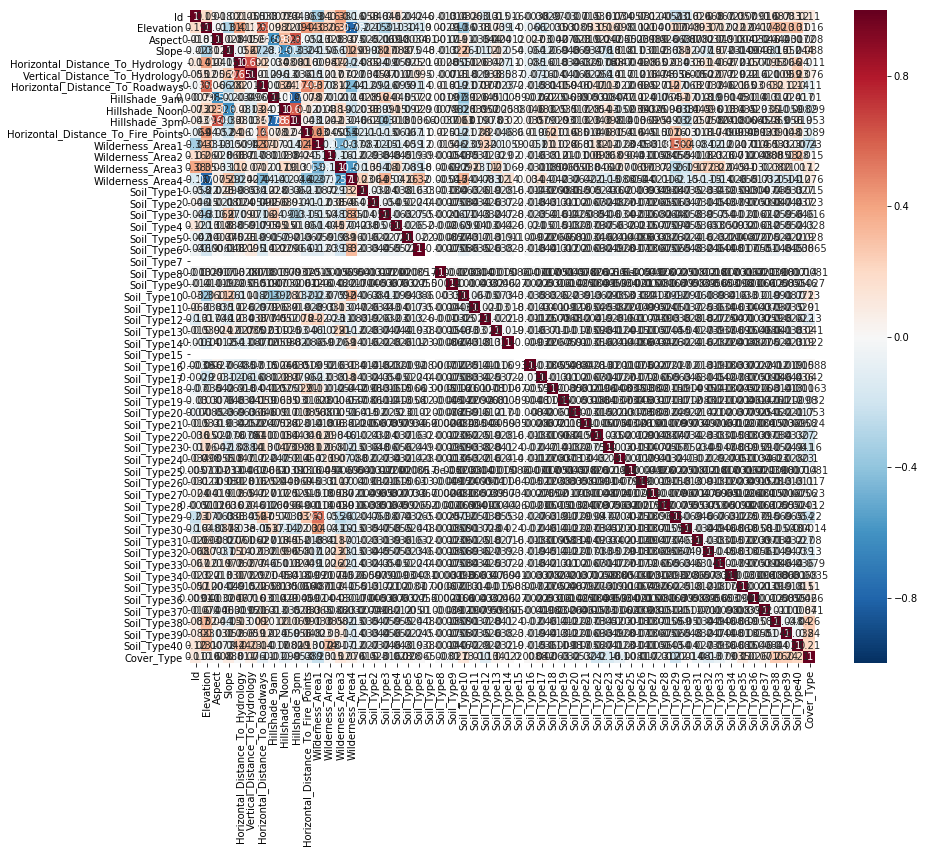

In [9]:
visualise_correlation(df)

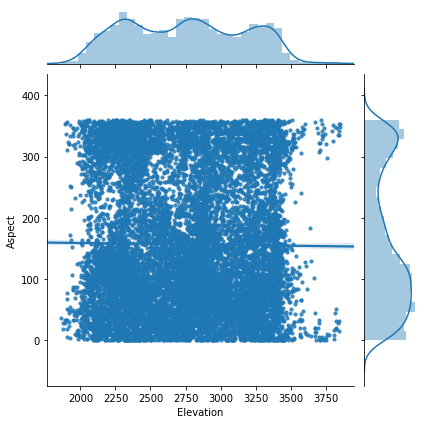

In [10]:
visualise_specific_correlation('Elevation','Aspect')

In [11]:
good_data = outliers_removal(df)

Data points considered outliers for the feature 'Id':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Elevation':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Aspect':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Slope':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1411    1412       2773      80     48                               124   
1416    1417       2779      78     47                               134   
1419    1420       2786      76     46                               150   
1423    1424       2743      76     49                               134   
1427    1428       2803      74     46                               175   
1431    1432       2760      75     49                               170   
1439    1440       2828      72     45                               228   
1444    1445       2789      74     49                               201   
1449    1450       2824      93     45                               190   
1454    1455       2827      84     46                               162   
1458    1459       2878      82     44                               150   
1459    1460       2827      84     46                               134   
1461    1462       2830      79     46                               108   
1469    1470       2840      78     44                                85   
2053    2054       2107     155     41                               120   
2224    2225       2606     319     41                               108   
2241    2242       2618     301     52                               124   
2696    2697       2001     103     46                                90   
2721    2722       1993      15     42                                85   
2722    2723       2113     310     46                               270   
2791    2792       2032     303     44                               153   
2988    2989       2029     291     41                               120   
3035    3036       2096      86     42                                60   
3056    3057       2095      89     41                                60   
3159    3160       2328     125     44                               366   
3194    3195       2190       1     41                               524   
3195    3196       2193       8     41                               518   
3204    3205       2348     136     46                               366   
3205    3206       2325     137     46                               361   
3253    3254       2330     123     41                               361   
3372    3373       2289     105     41                               277   
3427    3428       2304     117     41                               277   
3428    3429       2278     115     43                               255   
3429    3430       2253     117     41                               234   
3565    3566       2255     123     41                               228   
4286    4287       2255     350     41                               180   
4287    4288       2265     341     46                               180   
4638    4639       2268     311     41                               124   
4929    4930       2367     314     47                               228   
8193    8194       3393      73     49                               306   
8221    8222       3352      88     46                               277   
8328    8329       3340      78     44                               180   
8396    8397       3353      81     47                               182   
8502    8503       2892     319     41                               390   
9797    9798       3247     165     41                               180   
9903    9904       3101       4     45                               240   
11818  11819       2727      77     50                               108   
11820  11821       2734      76     49                               124   
12148  12149       1977      87     41                                30   
12242  12243       2025      92     46                               120   
12277  12278       1993     291     41                               127   
12336  12337       2157     295     41                    

Data points considered outliers for the feature 'Horizontal_Distance_To_Hydrology':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
206      207       3172      50     11                               759   
217      218       3201      10     13                               984   
236      237       3244     326      5                               750   
237      238       3237      27     14                               997   
243      244       3047      90      3                               870   
248      249       3027     152     10                               792   
255      256       3018     109     10                               815   
256      257       3011      85      5                               842   
258      259       3004     135      7                               811   
260      261       3260     128     11                               743   
279      280       3008     135      3                               931   
287      288       3136     329     13                               789   
292      293       3155     328     14                               849   
293      294       2991     285     11                               849   
304      305       3142      59     21                               730   
308      309       3001     246      9                               764   
353      354       3001     276      9                               752   
354      355       3008     281     10                               780   
375      376       3021     238      9                               815   
520      521       3047     135      3                               932   
713      714       2655      21     13                               741   
1038    1039       3157     240     11                               830   
1046    1047       3166     230      7                               771   
1108    1109       3289     251     10                               812   
1803    1804       2931     283     26                               778   
1892    1893       2922     272     31                               799   
1954    1955       2847     291     36                               743   
2767    2768       3327     123      5                               842   
2769    2770       3339     203     17                               726   
2793    2794       3304     144     10                               741   
...      ...        ...     ...    ...                               ...   
14551  14552       3371     264     13                               847   
14553  14554       3370     265     14                               870   
14554  14555       3761     297     11                               847   
14556  14557       3390     298     14                               953   
14557  14558       3802     352     13                               957   
14558  14559       3805     325     19                               834   
14559  14560       3815     349     14                               892   
14560  14561       3825      19     12                              1062   
14561  14562       3844     335      4                               918   
14562  14563       3849     348     17                               891   
14589  14590       3481     293     15                              1199   
14590  14591       3387     300     21                              1087   
14632  14633       3173     298     13                               875   
14656  14657       3282     340     21                               755   
14657  14658       3294     356     22                               779   
14675  14676       3294      12     12                               900   
14677  14678       3019      44     19                               752   
14686  14687       3316       1     15                               904   
14712  14713       3100      35     22                               730   
14713  14714       3277     215     10                               962   
14717  14718       3390      65     14                    

Data points considered outliers for the feature 'Vertical_Distance_To_Hydrology':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
197      198       3077     256      4                               618   
708      709       2931       4     12                               579   
723      724       2975      38     11                               633   
1218    1219       2871      67     22                               600   
1283    1284       2865      85     15                               400   
1414    1415       2847      50     27                               323   
1430    1431       2899      35     18                               430   
1433    1434       2856      53     28                               335   
1528    1529       2795      80     31                               270   
1596    1597       2784      87     31                               240   
1599    1600       2803      83     33                               270   
1706    1707       2858      90     28                               335   
1707    1708       2842      87     28                               309   
1715    1716       2871      94     26                               376   
1722    1723       2856      91     28                               366   
1742    1743       2887      96     28                               450   
1791    1792       2897      90     20                               582   
1803    1804       2931     283     26                               778   
1892    1893       2922     272     31                               799   
1954    1955       2847     291     36                               743   
2021    2022       2751     317     22                               430   
2035    2036       2770     325     24                               466   
2061    2062       2787     323     26                               450   
2087    2088       2768     301     30                               365   
2088    2089       2808     311     27                               454   
2103    2104       2778     301     30                               371   
2121    2122       2786     298     29                               379   
2122    2123       2800     300     27                               408   
2150    2151       2812     279     25                               430   
2172    2173       2791     102     30                               524   
...      ...        ...     ...    ...                               ...   
14563  14564       3384      92     15                               553   
14564  14565       3354      89     17                               510   
14570  14571       3411     169     15                               459   
14571  14572       3372     102     16                               395   
14573  14574       3401     168     13                               417   
14574  14575       3387     162     26                               395   
14575  14576       3383     182     23                               361   
14589  14590       3481     293     15                              1199   
14590  14591       3387     300     21                              1087   
14646  14647       3139      52     28                               566   
14694  14695       2962      51     13                               658   
14704  14705       3145      98     22                               437   
14719  14720       3187      69     18                               690   
14747  14748       3417      51      3                               765   
14749  14750       3413      27      8                               636   
14753  14754       3438     335     10                               787   
14769  14770       3439     288     16                               671   
14782  14783       3439      21     14                               446   
14788  14789       3452       8      9                               509   
14790  14791       3465       6     12                               509   
14791  14792       3465      17     13                    

Data points considered outliers for the feature 'Horizontal_Distance_To_Roadways':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
11        12       2886     151     11                               371   
21        22       2880     209     17                               216   
27        28       2962     148     16                               323   
35        36       2900      45     19                               242   
61        62       2952     107     11                                42   
67        68       2919      13     13                                90   
71        72       3008      45     14                               277   
72        73       2893     114     16                               108   
73        74       2850       6      9                                 0   
75        76       2864     118     18                               201   
79        80       2840     153     26                               134   
93        94       3073     173     12                               108   
94        95       2978      71     10                               426   
96        97       3067     164     11                                85   
100      101       2998      45      8                               351   
106      107       3067      32      4                                30   
107      108       2909      57     16                               134   
110      111       3182     105     11                               408   
115      116       3195     111     15                               469   
116      117       2982      53     14                               240   
121      122       3070       0     11                                30   
122      123       3057     124     12                               150   
123      124       2818     119     19                                30   
124      125       2847     320     33                                85   
130      131       2929     356     12                                 0   
132      133       2991      49     13                                85   
133      134       2939      56     18                                95   
135      136       3119     119      7                               162   
136      137       2942     346     12                                30   
140      141       3106     228     18                               658   
...      ...        ...     ...    ...                               ...   
14527  14528       3409     315     12                               424   
14528  14529       3674     357     15                              1154   
14529  14530       3672       7     16                              1172   
14530  14531       3671      13     17                              1179   
14531  14532       3401     324     11                               531   
14532  14533       3403     326     10                               509   
14533  14534       3414     313     12                               446   
14534  14535       3682       0     14                              1189   
14538  14539       3703       6     10                              1114   
14540  14541       3710       0      4                              1077   
14541  14542       3708       3     12                              1131   
14542  14543       3716     359     15                              1103   
14544  14545       3469     314     13                               860   
14545  14546       3737       1     17                              1074   
14546  14547       3459     285     16                               882   
14547  14548       3468     289     16                               899   
14548  14549       3721     342     10                               953   
14549  14550       3740     347     16                              1020   
14550  14551       3755       0     16                              1065   
14551  14552       3371     264     13                               847   
14553  14554       3370     265     14                    

Data points considered outliers for the feature 'Hillshade_9am':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
124      125       2847     320     33                                85   
167      168       2860     276     33                                60   
718      719       2920     316     29                               433   
884      885       2975     354     40                               474   
1889    1890       2533     322     29                                85   
1892    1893       2922     272     31                               799   
1902    1903       2597     321     28                               192   
1930    1931       2113     251     33                               150   
1950    1951       2027     272     37                                60   
1954    1955       2847     291     36                               743   
1967    1968       2092     270     29                               150   
1980    1981       2175     303     31                               270   
1984    1985       2611     296     28                               120   
1985    1986       2639     306     27                               180   
2019    2020       2683     296     28                               256   
2020    2021       2726     308     27                               342   
2023    2024       2572     320     28                               124   
2027    2028       2026     271     34                                60   
2038    2039       2024     323     31                                30   
2047    2048       2637     302     27                               150   
2048    2049       2651     297     32                               180   
2049    2050       2685     299     29                               240   
2051    2052       2041     327     33                                60   
2077    2078       2654     302     29                               153   
2087    2088       2768     301     30                               365   
2102    2103       2641     292     27                               124   
2103    2104       2778     301     30                               371   
2120    2121       2742     297     29                               295   
2121    2122       2786     298     29                               379   
2122    2123       2800     300     27                               408   
...      ...        ...     ...    ...                               ...   
13297  13298       3205     289     31                               534   
13346  13347       2336     274     31                                90   
13354  13355       3106     294     30                               120   
13442  13443       2474     289     26                               120   
13446  13447       2341     317     32                                67   
13449  13450       2406     295     28                                42   
13485  13486       3254     304     32                               150   
13516  13517       3415     282     32                                30   
13629  13630       2452     305     29                                90   
13855  13856       2508     305     32                               108   
13860  13861       2784     264     32                               313   
14001  14002       2880     250     35                               295   
14092  14093       2835     276     29                               319   
14191  14192       2875     288     28                               618   
14197  14198       2839     288     28                               541   
14263  14264       2840     270     37                               120   
14289  14290       2905     241     35                               175   
14317  14318       2957     270     33                               430   
14348  14349       3200     311     28                               324   
14537  14538       3200     349     42                               108   
14598  14599       2952     304     28                    

Data points considered outliers for the feature 'Hillshade_Noon':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
478      479       3014       5     31                                95   
504      505       2646       9     33                                60   
884      885       2975     354     40                               474   
1233    1234       2765      53     29                               313   
1240    1241       2786      53     29                               335   
1258    1259       2803      57     32                               323   
1268    1269       2799      52     29                               300   
1280    1281       2738      63     33                               134   
1287    1288       2774      58     30                               190   
1289    1290       2771      56     30                               175   
1290    1291       2755      62     34                               150   
1292    1293       2750      70     36                               120   
1293    1294       2732      71     33                                90   
1294    1295       2737      70     34                                95   
1301    1302       2767      73     36                               134   
1304    1305       2773      74     36                               150   
1320    1321       2778      80     34                               150   
1329    1330       2756      70     31                                30   
1375    1376       2806      76     39                               234   
1377    1378       2811      80     35                               255   
1411    1412       2773      80     48                               124   
1416    1417       2779      78     47                               134   
1419    1420       2786      76     46                               150   
1423    1424       2743      76     49                               134   
1427    1428       2803      74     46                               175   
1431    1432       2760      75     49                               170   
1439    1440       2828      72     45                               228   
1440    1441       2710      66     32                                90   
1444    1445       2789      74     49                               201   
1446    1447       2743      61     33                               108   
...      ...        ...     ...    ...                               ...   
12975  12976       3050      13     33                               228   
12982  12983       3175      52     30                               570   
12996  12997       2300      59     33                                90   
13059  13060       2259      25     34                                30   
13074  13075       2272      41     33                                60   
13186  13187       2300      94     36                                30   
13267  13268       3330      76     32                                90   
13429  13430       2375      23     30                                42   
13457  13458       2335      27     29                                30   
13463  13464       2379      36     34                                85   
13533  13534       3194      61     34                               485   
13716  13717       3021     357     33                               300   
14061  14062       2868      71     33                               153   
14068  14069       3417      86     46                               342   
14120  14121       3323      75     46                               153   
14366  14367       3336      93     37                               242   
14407  14408       3444      76     33                               153   
14472  14473       2858      49     29                               150   
14537  14538       3200     349     42                               108   
14681  14682       3024      59     30                               190   
14779  14780       3397     332     38                    

Data points considered outliers for the feature 'Hillshade_3pm':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1301    1302       2767      73     36                               134   
1304    1305       2773      74     36                               150   
1375    1376       2806      76     39                               234   
1411    1412       2773      80     48                               124   
1416    1417       2779      78     47                               134   
1419    1420       2786      76     46                               150   
1423    1424       2743      76     49                               134   
1424    1425       2728      62     29                               108   
1427    1428       2803      74     46                               175   
1431    1432       2760      75     49                               170   
1439    1440       2828      72     45                               228   
1440    1441       2710      66     32                                90   
1444    1445       2789      74     49                               201   
1446    1447       2743      61     33                               108   
1449    1450       2824      93     45                               190   
1454    1455       2827      84     46                               162   
1455    1456       2810      76     29                               150   
1458    1459       2878      82     44                               150   
1459    1460       2827      84     46                               134   
1461    1462       2830      79     46                               108   
1462    1463       2820      60     25                                95   
1469    1470       2840      78     44                                85   
1517    1518       3244      54     40                               255   
1608    1609       2830      88     35                               256   
1648    1649       2725      82     35                               108   
1657    1658       2848      84     35                               190   
1659    1660       2707      83     35                                90   
1671    1672       2848      91     35                               247   
2127    2128       2023      83     29                                30   
2289    2290       2039      88     25                                30   
...      ...        ...     ...    ...                               ...   
11327  11328       2639     103     36                               541   
11818  11819       2727      77     50                               108   
11820  11821       2734      76     49                               124   
11828  11829       2867      80     35                               201   
11964  11965       2102     100     32                               510   
12092  12093       2081      84     35                               175   
12148  12149       1977      87     41                                30   
12242  12243       2025      92     46                               120   
12337  12338       2090      92     28                                30   
12338  12339       2165      93     36                               153   
12346  12347       2165      90     36                               150   
12351  12352       2123      94     37                                90   
12353  12354       2160      90     37                               330   
12361  12362       2115     104     36                                95   
12367  12368       2212      98     36                               228   
12384  12385       2137     100     36                               124   
12392  12393       2180     107     38                               162   
12393  12394       2133     102     35                               108   
12423  12424       2292     101     38                               297   
13174  13175       2272      80     23                                 0   
13186  13187       2300      94     36                    

Data points considered outliers for the feature 'Horizontal_Distance_To_Fire_Points':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
5          6       2579     132      6                               300   
6          7       2606      45      7                               270   
7          8       2605      49      4                               234   
8          9       2617      45      9                               240   
9         10       2612      59     10                               247   
10        11       2612     201      4                               180   
11        12       2886     151     11                               371   
12        13       2742     134     22                               150   
13        14       2609     214      7                               150   
14        15       2503     157      4                                67   
15        16       2495      51      7                                42   
16        17       2610     259      1                               120   
17        18       2517      72      7                                85   
18        19       2504       0      4                                95   
19        20       2503      38      5                                85   
20        21       2501      71      9                                60   
21        22       2880     209     17                               216   
22        23       2768     114     23                               192   
23        24       2511      54      8                               124   
24        25       2507      22      9                               120   
25        26       2492     135      6                                 0   
26        27       2489     163     10                                30   
28        29       2811     135      1                               212   
29        30       2739     117     24                               127   
30        31       2703     122     30                                67   
...      ...        ...     ...    ...                               ...   
14421  14422       3387     128      8                                60   
14430  14431       3374     155      8                                30   
14441  14442       3371     133      9                                42   
14442  14443       3366       5     20                               342   
14447  14448       3354     164      7                                67   
14454  14455       3367      32      3                                30   
14487  14488       3401     292     10                               382   
14495  14496       3408     303     11                               319   
14501  14502       3454     326     10                               499   
14511  14512       3423     312     12                               256   
14514  14515       3465     315     14                               309   
14516  14517       3472     322      8                               300   
14517  14518       3492     322     11                               404   
14518  14519       3460     304     12                               228   
14519  14520       3463     304     10                               201   
14522  14523       3456     287     14                               150   
14523  14524       3467     282      8                               150   
14525  14526       3440     262     16                                67   
14845  14846       3343     227     18                               499   
14846  14847       3358     126     10                               212   
14847  14848       3337      60     17                    

Data points considered outliers for the feature 'Wilderness_Area1':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
5          6       2579     132      6                               300   
6          7       2606      45      7                               270   
7          8       2605      49      4                               234   
8          9       2617      45      9                               240   
9         10       2612      59     10                               247   
10        11       2612     201      4                               180   
11        12       2886     151     11                               371   
12        13       2742     134     22                               150   
13        14       2609     214      7                               150   
14        15       2503     157      4                                67   
15        16       2495      51      7                                42   
16        17       2610     259      1                               120   
17        18       2517      72      7                                85   
18        19       2504       0      4                                95   
19        20       2503      38      5                                85   
20        21       2501      71      9                                60   
21        22       2880     209     17                               216   
22        23       2768     114     23                               192   
23        24       2511      54      8                               124   
24        25       2507      22      9                               120   
25        26       2492     135      6                                 0   
26        27       2489     163     10                                30   
27        28       2962     148     16                               323   
28        29       2811     135      1                               212   
29        30       2739     117     24                               127   
...      ...        ...     ...    ...                               ...   
14384  14385       3390      86     12                               212   
14385  14386       3034     107      5                               335   
14388  14389       3163     128     14                                42   
14391  14392       3413      96     11                               162   
14395  14396       3464      80     27                               242   
14396  14397       3395      82     10                               124   
14397  14398       3381      79      8                               201   
14398  14399       3309      85      8                               210   
14399  14400       3388      60      5                               124   
14400  14401       3001     112      9                               150   
14404  14405       3120     162      9                                 0   
14407  14408       3444      76     33                               153   
14408  14409       3383     121      8                                95   
14409  14410       3011     184      3                               228   
14411  14412       3559     107     13                               218   
14412  14413       3417      68     21                                90   
14413  14414       3328      59     14                                90   
14420  14421       3423      62     24                                90   
14425  14426       3520      86     27                               234   
14426  14427       3014      90      5                               162   
14428  14429       3154      69     14                    

Data points considered outliers for the feature 'Wilderness_Area2':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
9308    9309       3007     323      5                               124   
9339    9340       2981     297     10                                30   
9448    9449       3056     356      6                               283   
9449    9450       3066     271     10                               180   
9457    9458       3066     277      9                               175   
9466    9467       3065      10      9                               180   
9490    9491       3086     291      6                               458   
9529    9530       3063     315      2                               534   
9556    9557       3072     334      9                                 0   
9578    9579       3091      74      3                               180   
9579    9580       3099     315      9                               120   
9588    9589       3012     324     13                               210   
9602    9603       3095     315      5                                30   
9616    9617       3106     358      5                                67   
9617    9618       3117     293      7                                67   
9620    9621       3061     313     10                                60   
9621    9622       3110     339      6                                30   
9627    9628       3113     343      6                                42   
9633    9634       3119     338      5                                30   
9637    9638       3041     301      1                               120   
9638    9639       3089     338      4                               379   
9639    9640       3091     338      5                               437   
9640    9641       3132     358      8                               295   
9644    9645       3107     325      6                               679   
9656    9657       3130     337      8                               433   
9671    9672       3116     350     11                               210   
9681    9682       3129       8      7                               270   
9682    9683       3167     342     10                               190   
9685    9686       3135     346      8                               402   
9694    9695       3147     354      9                               270   
...      ...        ...     ...    ...                               ...   
14813  14814       3376     347     18                                30   
14814  14815       3393     347     20                                30   
14815  14816       3512     310     11                               400   
14817  14818       3493     296     12                               301   
14818  14819       3515     279      9                               391   
14820  14821       3421     325     17                               134   
14821  14822       3516     320     14                               323   
14822  14823       3352      40     19                               240   
14824  14825       3509     327     15                               190   
14827  14828       3575     340     16                               300   
14829  14830       3604     353     12                               309   
14835  14836       3327      35      8                                42   
14838  14839       3151     149     13                               277   
14839  14840       3325      97     11                               430   
14840  14841       3374     180     15                                 0   
14842  14843       3139     149     13                               150   
14843  14844       3292     201     30                               190   
14844  14845       3235     185     16                                30   
14845  14846       3343     227     18                               499   
14846  14847       3358     126     10                               212   
14847  14848       3337      60     17                    

Data points considered outliers for the feature 'Wilderness_Area3':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Wilderness_Area4':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type1':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1911    1912       2173      50     28                               124   
1951    1952       2161     113     32                               458   
1968    1969       2110      54     25                               342   
1979    1980       2206      65     33                               210   
1982    1983       2132      73     27                               365   
1989    1990       2162     166     33                               277   
1998    1999       2143     170     32                               247   
2013    2014       2129     197     33                               242   
2014    2015       2151     177     23                               295   
2015    2016       2077      99     26                               285   
2053    2054       2107     155     41                               120   
2054    2055       2070     181     28                               134   
2055    2056       2051     107     24                               180   
2068    2069       2016     116     28                               120   
2081    2082       2028     136     30                               175   
2091    2092       2027     196     20                                42   
2092    2093       2062     259     21                                95   
2093    2094       2032     120     33                               190   
2110    2111       2093     247     23                               127   
2131    2132       1974     125     22                                85   
2144    2145       2061     242     36                                67   
2157    2158       2124     279     19                               242   
2178    2179       2126     291     18                               268   
2185    2186       2069     258     38                                60   
2213    2214       2081     117     31                               150   
2228    2229       2044      92     15                                30   
2229    2230       1905      33     27                                90   
2249    2250       2039     128     13                                 0   
2250    2251       1948      84     19                                 0   
2251    2252       1904      51     26                                67   
...      ...        ...     ...    ...                               ...   
12717  12718       2312     308     15                                30   
12720  12721       2055     105     21                                 0   
12724  12725       2213     248      5                                 0   
12844  12845       2104      37     21                                 0   
12855  12856       2357      46     15                               295   
12882  12883       2233     153     11                                30   
12886  12887       2212     188     22                                 0   
12900  12901       2164      55     32                                 0   
12904  12905       2165      78     11                                 0   
12914  12915       2389     101     19                               295   
12933  12934       2216      70     32                                 0   
12978  12979       2188      72     12                                 0   
13037  13038       2284      74     24                                30   
13038  13039       2270      81     26                                 0   
13090  13091       2234     126     18                                 0   
13103  13104       2270     193     27                                42   
13203  13204       2360     219     28                               153   
13224  13225       2343     250     18                               180   
13285  13286       2390      98     25                               150   
13321  13322       2359      96     17                                 0   
13331  13332       2369      57     15                    

Data points considered outliers for the feature 'Soil_Type2':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1959    1960       2223     294     21                               212   
2011    2012       2223     287      6                               301   
2232    2233       1906     356     20                               150   
2233    2234       1888      33     22                               150   
2234    2235       1863      37     17                               120   
2247    2248       2208     135     10                               120   
2248    2249       2199     200     22                                60   
2254    2255       1898      34     23                               175   
2276    2277       1916      24     25                               212   
2335    2336       2227     170     12                               258   
2357    2358       2220     178     11                               201   
2358    2359       2217     111      6                               182   
2423    2424       2209     293     21                               376   
2424    2425       2218     329     13                               382   
2451    2452       2224     326     14                               361   
2615    2616       2168      43     22                               240   
2634    2635       2100     143     27                                85   
2643    2644       2141      86     27                               240   
2688    2689       2257     328     30                               150   
2717    2718       2165      86     27                               330   
2738    2739       2238      58     20                               360   
2739    2740       2210      92     12                               390   
2740    2741       2201     101     16                               390   
2741    2742       2191      83     17                               390   
2751    2752       2076     168      8                               150   
2765    2766       2073      98     13                               150   
2766    2767       2049     127     20                                60   
2780    2781       2263      17     11                               420   
2781    2782       2257      55     13                               420   
2786    2787       2286     335      5                               150   
...      ...        ...     ...    ...                               ...   
14943  14944       2737     104      7                               277   
14953  14954       2407     266      3                                85   
14961  14962       2525     233     23                                85   
14966  14967       2657      91     16                               309   
14981  14982       2351      95     18                                90   
14982  14983       2334     116     11                                30   
14988  14989       2501     219     12                               120   
15003  15004       2436      72     18                                42   
15014  15015       2596     273     12                               362   
15015  15016       2605      28     12                               335   
15018  15019       2570     225     11                               376   
15019  15020       2610     104      7                               362   
15023  15024       2615     274      9                               391   
15029  15030       2580     234     22                               371   
15033  15034       2608     306     18                               379   
15037  15038       2574       7     10                               228   
15040  15041       2622      34      7                               212   
15044  15045       2494     146     20                               212   
15045  15046       2622     260     12                               335   
15046  15047       2633     117      3                               277   
15048  15049       2613      90     10                    

Data points considered outliers for the feature 'Soil_Type3':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2363    2364       1903      67     16                               108   
2487    2488       2029     107     34                               330   
2608    2609       2005     122     30                               277   
2635    2636       1939     153     18                               134   
2636    2637       1936     163     13                               120   
2655    2656       1929     172     16                                90   
2680    2681       1965      78     22                               170   
2706    2707       2070      97     31                               242   
2792    2793       1949      82     20                               108   
2813    2814       1962      87     20                               124   
2831    2832       2013     163     23                                85   
2926    2927       2029      61     27                                30   
2945    2946       2040     106     28                                30   
2963    2964       2079     102     35                                67   
2964    2965       2054      98     34                                42   
2981    2982       2145      90     38                               134   
2982    2983       2117      96     38                               108   
2983    2984       2094     100     37                                85   
2984    2985       2055      90     26                                30   
2985    2986       2044      13     14                                 0   
3003    3004       2137      94     40                               124   
3004    3005       2114      90     37                                95   
3005    3006       2067      96     35                                42   
3033    3034       2184      90     30                               180   
3034    3035       2139      84     37                               120   
3035    3036       2096      86     42                                60   
3052    3053       2198      95     29                               210   
3053    3054       2183     100     32                               180   
3054    3055       2161     100     35                               150   
3055    3056       2144      97     34                               120   
...      ...        ...     ...    ...                               ...   
13255  13256       2274     126     10                                 0   
13282  13283       2367     147     16                               201   
13303  13304       2386      60     22                               391   
13344  13345       2323      80     21                                60   
13353  13354       2387     125     15                               417   
13355  13356       2368     140     24                               162   
13356  13357       2292      75     26                                30   
13371  13372       2369     117     16                               190   
13390  13391       2366     125     20                               127   
13414  13415       2319     229      9                                 0   
14861  14862       2576     209     29                               234   
14866  14867       2622     187     29                               323   
14867  14868       2698     203     19                                60   
14902  14903       2604     104     30                                30   
14908  14909       2335     252     11                                30   
14911  14912       2633      93     19                               124   
14915  14916       2549     235     26                                30   
14917  14918       2547     230     40                                95   
14919  14920       2425     172      5                                 0   
14923  14924       2581     202     23                               170   
14924  14925       2531     226     27                    

Data points considered outliers for the feature 'Soil_Type4':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1895    1896       2455     121     18                                 0   
1978    1979       2594      80     19                               268   
2641    2642       2660     238     26                                42   
2736    2737       2676     271     20                                30   
2820    2821       2192      53     31                               256   
2821    2822       2141      64     33                               175   
2865    2866       1989     302     18                                 0   
2927    2928       2016       5     22                                 0   
3075    3076       2054     311     10                                 0   
3099    3100       2071     292     26                                 0   
3114    3115       2118     200     23                                30   
3115    3116       2121     179     25                                30   
3116    3117       2118     154     21                                 0   
3172    3173       2073     312     24                                 0   
3215    3216       2073     312     18                                 0   
3381    3382       2078     279      9                                 0   
3481    3482       2080      62      8                                 0   
3575    3576       2094       4     17                                 0   
3576    3577       2094       9     17                                 0   
3577    3578       2092     343     13                                 0   
3595    3596       2328     155      5                               395   
3622    3623       2100     352     23                                 0   
3623    3624       2100       6     19                                 0   
3674    3675       2108     338     16                                 0   
3706    3707       2122       5     22                                 0   
3781    3782       2045      46     22                               124   
3806    3807       2111     338      7                                 0   
3847    3848       2116     353     13                                 0   
3880    3881       2127     334     24                                30   
3890    3891       2295     159     18                               153   
...      ...        ...     ...    ...                               ...   
15030  15031       2430      93     29                                95   
15032  15033       2344      63     16                                30   
15036  15037       2549     189     23                               323   
15038  15039       2526     173     26                               342   
15039  15040       2580     232     28                               360   
15041  15042       2389     133     15                                67   
15042  15043       2492     222     31                               285   
15047  15048       2489     207     29                               212   
15050  15051       2537     142     11                               120   
15051  15052       2473     127     28                                90   
15052  15053       2488     132     30                                67   
15056  15057       2607     187      8                               376   
15060  15061       2561     209     28                               255   
15069  15070       2555     217     31                               242   
15070  15071       2523     210     30                               190   
15072  15073       2487     197     24                               240   
15073  15074       2434     225     35                                30   
15074  15075       2453     213     34                                42   
15075  15076       2430     143     22                               256   
15078  15079       2497     180     31                               240   
15079  15080       2420     167     23                    

Data points considered outliers for the feature 'Soil_Type5':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1820    1821       2011     344     17                               313   
1824    1825       2022      24     13                               391   
1825    1826       2038      50     17                               408   
1827    1828       2018     341     27                               351   
1837    1838       2074     348     18                               499   
1849    1850       2089      41     19                               424   
1857    1858       2018     303     24                                60   
1858    1859       2102      33     12                               382   
1869    1870       2025     288     26                                67   
1870    1871       2097      23     16                               408   
1871    1872       2121     345     29                               564   
1872    1873       2121      28     26                               571   
1873    1874       2020      74     18                               301   
1875    1876       2044     276     25                               108   
1876    1877       2047      31     21                               216   
1882    1883       2050       3     13                               201   
1890    1891       2092     262     17                               309   
1891    1892       2160     349     12                               532   
1907    1908       2090       0     29                               201   
1908    1909       2092     352     27                               228   
1909    1910       2167     320     16                               488   
1910    1911       2125      64     27                               543   
1921    1922       2008     226     32                                30   
1922    1923       2119      26     35                               437   
1930    1931       2113     251     33                               150   
1931    1932       2088      66     33                               313   
1938    1939       2170     334     26                               379   
1948    1949       2172     325     20                               313   
1950    1951       2027     272     37                                60   
1967    1968       2092     270     29                               150   
...      ...        ...     ...    ...                               ...   
12128  12129       2079     324     32                               360   
12141  12142       2033     344     36                               390   
12149  12150       2093     325     34                               362   
12158  12159       2096     312     27                               350   
12164  12165       2106     341     35                               382   
12448  12449       2182      61     31                                 0   
12478  12479       2113      85     20                                 0   
12493  12494       2101      39     19                                 0   
12494  12495       2094      44     20                                 0   
12523  12524       2338     336     15                               300   
12524  12525       2222      65     34                               127   
12525  12526       2149      51     25                                90   
12569  12570       2339      26     23                               192   
12580  12581       2327     320     20                               162   
12602  12603       2323     264     12                               162   
12687  12688       2336     300     16                               162   
13149  13150       2451      58     14                               124   
13150  13151       2415      67     19                                30   
13165  13166       2418      74     14                                 0   
13213  13214       2441      85     13                                 0   
13215  13216       2289      81      9                    

Data points considered outliers for the feature 'Soil_Type6':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2607    2608       2103     225     20                               127   
2705    2706       2108     240     17                               120   
2806    2807       2283     338     24                               234   
2827    2828       2293      27     14                               268   
2873    2874       2030      77     22                                67   
2895    2896       2250     313     17                               242   
2907    2908       2413      49      9                               124   
2915    2916       2260     311     14                               228   
2933    2934       2052      55     27                               150   
2943    2944       2313     299     29                               108   
2948    2949       2281     325     19                               234   
2949    2950       2277      13     31                               170   
2959    2960       2239     341     17                               295   
2968    2969       2265     311     20                               324   
2969    2970       2292      16     29                               212   
2974    2975       2416     102     13                               175   
2978    2979       2258     298     21                               258   
2989    2990       2304      15     28                               255   
2991    2992       2282      51     20                               335   
2992    2993       2035      39     23                               210   
3001    3002       2333     273     27                                90   
3002    3003       2339     106     29                               210   
3007    3008       2314     324     21                               277   
3008    3009       2313     353     25                               218   
3029    3030       2270     347     20                               306   
3039    3040       2081      28     32                               277   
3049    3050       2320     228     17                               150   
3050    3051       2314     321     23                                67   
3058    3059       2298     111     16                               242   
3076    3077       2114      34     34                               268   
...      ...        ...     ...    ...                               ...   
13301  13302       2414      85     19                               150   
13302  13303       2406     235     11                               134   
13308  13309       2413      50      4                               537   
13315  13316       2507     116      8                               124   
13318  13319       2413     140      4                               576   
13323  13324       2489     358     13                               270   
13324  13325       2487     359     14                               277   
13325  13326       2519     313     10                               361   
13329  13330       2412      93     17                               124   
13332  13333       2495       7     14                               301   
13333  13334       2513      56      5                                42   
13334  13335       2449     106     16                               192   
13336  13337       2424      48     11                               618   
13360  13361       2532     350     10                               309   
13361  13362       2465     113     12                               134   
13366  13367       2428     167     12                                60   
13374  13375       2404      37     14                                 0   
13377  13378       2481       6     13                               170   
13378  13379       2434      64      7                                 0   
13382  13383       2468      81     17                               509   
13384  13385       2436      23     14                    

Data points considered outliers for the feature 'Soil_Type7':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type8':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
497  498       2900     180      3                               300   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
497                              -2                             4725   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
497            220             241            156     ...                0   

     Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
497            0            0            0            0            0   

     Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
497            0            0            0           2  

[1 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type9':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
762      763       2534     108      2                               247   
772      773       2539      24      6                               120   
783      784       2564      44     18                                67   
814      815       2624     109     14                               127   
835      836       2544      86      7                               247   
1016    1017       2595      37     18                               218   
11596  11597       2579     247      2                               283   
11600  11601       2590       9      9                               330   
11624  11625       2624      45      3                                 0   
11668  11669       2584      28     13                               182   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
762                                13                              234   
772                                -3                              446   
783                                21                              680   
814                                14                              911   
835                               -16                             1020   
1016                               51                              930   
11596                              -2                              382   
11600                              45                              484   
11624                               0                             1339   
11668                              40                              900   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
762              221             237            151     ...                0   
772              217             226            146     ...                0   
783              221             199            106     ...                0   
814              244             223            105     ...                0   
835              230             229            132     ...                0   
1016             216             197            110     ...                0   
11596            215             240            162     ...                0   
11600            211             223            149     ...                0   
11624            220             232            148     ...                0   
11668            215             212            131     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
762              0            0            0            0            0   
772              0            0            0            0            0   
783              0            0            0            0            0   
814              0            0            0            0            0   
835              0            0            0            0            0   
1016             0            0            0            0            0   
11596            0            0            0            0            0   
11600            0            0            0            0            0   
11624            0            0            0            0            0   
11668            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
762              0            0            0           2  
772              0            0            0           2  
783              0            0            0           2  
814              0            0            0           2  
835              0            0            0           2  
1016             0            0            0           2  
11596            0            0            0           1  
11600            0            0            0           2  
11624            0            0            0           2  
11668            0            0            0           2  

[10 rows x 5

Data points considered outliers for the feature 'Soil_Type10':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1810    1811       2556     334     21                                85   
1814    1815       2577     323     10                               150   
1856    1857       2422      45     11                                85   
1920    1921       2092      59     25                                90   
1937    1938       2493     345     28                                60   
1996    1997       2510     323     21                                30   
2009    2010       2529     319     25                                60   
2010    2011       2538     318     27                                85   
2023    2024       2572     320     28                               124   
2051    2052       2041     327     33                                60   
2052    2053       2010      70     23                                 0   
2108    2109       2035     323     23                                95   
2126    2127       2045     313     23                               124   
2127    2128       2023      83     29                                30   
2143    2144       2037      29     24                                 0   
2158    2159       2025      33     19                                42   
2159    2160       2022      19     14                                30   
2160    2161       2018      27      9                                 0   
2162    2163       2034      55     22                                30   
2163    2164       2025      51      9                                30   
2179    2180       2034      35     21                                67   
2180    2181       2030      18     18                                42   
2181    2182       2020     358     25                                 0   
2182    2183       2028      22     12                                30   
2197    2198       2059     340     18                                95   
2198    2199       2040     358     24                                60   
2199    2200       2036      39     16                                42   
2211    2212       2041      61     16                                30   
2227    2228       2072     346     19                               150   
2266    2267       2078     311     33                                95   
...      ...        ...     ...    ...                               ...   
15031  15032       2609      14     12                               300   
15034  15035       2615      18     10                               277   
15035  15036       2601      35     15                               212   
15053  15054       2395     349     32                                95   
15055  15056       2460      22     11                                42   
15057  15058       2397      51     21                                30   
15061  15062       2481       3     18                               242   
15068  15069       2446      41     27                                67   
15071  15072       2462      34     19                               120   
15077  15078       2524      34     22                                30   
15080  15081       2487      44     27                               255   
15082  15083       2436      53     24                               175   
15083  15084       2588     350     24                                30   
15084  15085       2414      27     13                               134   
15085  15086       2404     353     16                               108   
15089  15090       2499      43     34                               277   
15092  15093       2529      43     33                               319   
15094  15095       2426      14     30                                67   
15095  15096       2410      19     22                                30   
15099  15100       2514      34     33                               256   
15100  15101       2519     341     22                    

Data points considered outliers for the feature 'Soil_Type11':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1809    1810       2552       4     19                                60   
1813    1814       2566     326     11                               256   
1818    1819       2553     235     17                               351   
1819    1820       2570     345     12                               124   
3232    3233       2431     280     22                               390   
3544    3545       2414     233      7                               391   
3819    3820       2317     116     11                               228   
3820    3821       2310     103     16                               218   
4214    4215       2313     123     17                               150   
4215    4216       2307     136     15                               127   
4325    4326       2293      93     13                                67   
4326    4327       2283     125     10                                30   
4380    4381       2281      83      8                                 0   
4524    4525       2290     193     10                                30   
4525    4526       2297     179     13                                30   
4526    4527       2295     148     12                                30   
4527    4528       2290     127      7                                 0   
4573    4574       2291      84      6                                 0   
4574    4575       2289      41      5                                 0   
4575    4576       2288      23      2                                 0   
4576    4577       2288     184      4                                 0   
4577    4578       2287     163      6                                 0   
4629    4630       2298     117     11                                 0   
4674    4675       2301     119     11                                 0   
4716    4717       2303     124     10                                 0   
4864    4865       2309     137      9                                 0   
5077    5078       2332     328     17                               180   
5115    5116       2340      29      7                               150   
5158    5159       2335     273      9                               175   
5351    5352       2340     353      9                               210   
...      ...        ...     ...    ...                               ...   
14023  14024       2767     145      8                               228   
14037  14038       2586      41     10                               492   
14042  14043       2736     145     12                                67   
14048  14049       2741      93     10                                95   
14266  14267       2742     334     10                               319   
14267  14268       2745     329     11                               342   
14270  14271       2850     355     15                               420   
14272  14273       2743     284      9                               331   
14276  14277       2724     318     12                               313   
14277  14278       2740     287     10                               351   
14278  14279       2750     281      5                               371   
14279  14280       2759     307      5                               474   
14870  14871       2543      56     14                               108   
14877  14878       2580     142      6                                85   
14878  14879       2580     180      1                               134   
14879  14880       2580     193      3                               127   
14882  14883       2547     111      6                                 0   
14884  14885       2688       0      0                               182   
14887  14888       2515      83     26                                42   
14898  14899       2645     105      3                               201   
14906  14907       2578       8     19                    

Data points considered outliers for the feature 'Soil_Type12':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2          3       2804     139      9                               268   
28        29       2811     135      1                               212   
44        45       2678     128      5                                95   
62        63       2705      90      8                               134   
68        69       2740      54      6                               218   
78        79       2808      99      7                               382   
81        82       2746     143     16                                67   
83        84       2840      14     14                               216   
87        88       2801      18      7                               560   
88        89       2791      63     10                               418   
95        96       2860      31     10                               295   
97        98       2804      72      5                               543   
112      113       2752     332      6                               342   
113      114       2751      88      5                               400   
120      121       2723      99      6                               301   
126      127       2893      83      6                               551   
127      128       2716       1     10                               234   
129      130       2613      37      5                               216   
142      143       2837     112      8                               272   
145      146       2728     135      3                               242   
152      153       2893      21      6                               295   
153      154       2687      20     11                               150   
157      158       2795      18      3                               218   
181      182       2755     320      4                                30   
192      193       2721     164      4                                67   
194      195       2724     132     11                                60   
198      199       2929     338      8                               190   
199      200       2735     127     12                                67   
209      210       2704      45     10                               323   
224      225       3004       0     12                               484   
...      ...        ...     ...    ...                               ...   
11480  11481       2774     139      9                               268   
11489  11490       2780     178     14                               170   
11492  11493       2896     302      9                               446   
11496  11497       2696      79      5                                95   
11498  11499       2900      41      5                               499   
11508  11509       2618      54      4                               242   
11509  11510       2543     107      8                               342   
11510  11511       2804     159     12                               190   
11518  11519       2556     108      7                               190   
11519  11520       2639     111     15                               212   
11530  11531       2853     120      7                               488   
11531  11532       2789     138      6                               127   
11535  11536       2755      76     20                               258   
11538  11539       3003     135      1                               361   
11539  11540       2998      87      9                               402   
11543  11544       2902     159     18                                60   
11545  11546       2736     125     17                               175   
11552  11553       2865     103     15                               108   
11585  11586       3004     189      9                               446   
11589  11590       2683      51     12                               319   
11607  11608       2766     133      9                    

Data points considered outliers for the feature 'Soil_Type13':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1926    1927       2591     122     26                                85   
1966    1967       2890     315      7                               342   
1974    1975       2813      80     30                               339   
2022    2023       2519     318     22                                30   
2024    2025       2588      36     15                                30   
2037    2038       2589     333     13                                30   
2050    2051       2607      35     15                                30   
2063    2064       2616     343     21                                60   
2064    2065       2617       9     16                                30   
2065    2066       2622     332     26                               108   
2079    2080       2622     331     24                                90   
2089    2090       2635      26     21                                30   
2106    2107       2646      31     22                                30   
2107    2108       2669     332     27                               175   
2124    2125       2647     341     22                                30   
2125    2126       2716     322     23                               319   
2138    2139       2548     318     18                                 0   
2139    2140       2688     333     26                               150   
2140    2141       2714     330     25                               270   
2141    2142       2721     331     25                               300   
2142    2143       2728     330     23                               323   
2150    2151       2812     279     25                               430   
2153    2154       2583     298     31                                67   
2154    2155       2601     297     31                                95   
2155    2156       2630     299     29                               153   
2156    2157       2671     309     26                               120   
2172    2173       2791     102     30                               524   
2174    2175       2622     288     26                               134   
2175    2176       2685      25     19                                30   
2195    2196       2699       6     15                                60   
...      ...        ...     ...    ...                               ...   
14135  14136       2921     260     22                               837   
14143  14144       2868     293     12                               859   
14144  14145       2858     137     25                               726   
14145  14146       2837     133     19                               757   
14149  14150       2879     144     16                               247   
14150  14151       2855     100     24                               162   
14155  14156       2872     157     16                               242   
14156  14157       2866     143     16                               212   
14159  14160       2847     129     23                               659   
14171  14172       2825     131     17                               624   
14177  14178       2834     127     23                               566   
14181  14182       2905     290     22                               655   
14191  14192       2875     288     28                               618   
14197  14198       2839     288     28                               541   
14223  14224       2851     233     24                               390   
14234  14235       2818     247     22                               313   
14263  14264       2840     270     37                               120   
14280  14281       2851     259     28                               162   
14289  14290       2905     241     35                               175   
14291  14292       2936     222     23                                 0   
14326  14327       3091     235     20                    

Data points considered outliers for the feature 'Soil_Type14':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2938    2939       2083     313     17                                 0   
3019    3020       2088      59      1                                 0   
3062    3063       2092     106     19                                 0   
3150    3151       2114      75      7                                 0   
3190    3191       2121       0      9                                 0   
3191    3192       2126       2     36                                30   
3233    3234       2130      76      6                                 0   
3234    3235       2126     345      7                                 0   
3235    3236       2128       2     11                                 0   
3321    3322       2143     101      6                                 0   
3322    3323       2144     357     12                                30   
3354    3355       2153     158     24                                 0   
3355    3356       2143     135      2                                 0   
3404    3405       2145     144      9                                 0   
3443    3444       2008      21      3                                 0   
3444    3445       2011       8     15                                30   
3445    3446       2006      35     23                                30   
3456    3457       2149      68      9                                 0   
3457    3458       2151     349     12                                30   
3485    3486       1997      45     25                                 0   
3492    3493       2155     347      9                                30   
3531    3532       2073      76     21                                 0   
3532    3533       2015      93     12                                 0   
3533    3534       1995      52     22                                 0   
3584    3585       2049      87     24                                 0   
3585    3586       2016     352     10                                 0   
3628    3629       2027     102     12                                 0   
3629    3630       2021     343     13                                 0   
3640    3641       2158     351     11                                 0   
3678    3679       2034     104     16                                 0   
...      ...        ...     ...    ...                               ...   
12454  12455       2143      67      2                                30   
12479  12480       2008      81      6                                 0   
12485  12486       2156     130      7                                 0   
12538  12539       2029     347     21                                 0   
12570  12571       2033      20      5                                 0   
12590  12591       2177     284     23                                30   
12603  12604       2050     334     15                                 0   
12633  12634       2180      51      7                                 0   
12655  12656       2190      23      9                                 0   
12657  12658       2190     141     19                                 0   
12710  12711       2209     327     24                                30   
12743  12744       2207      45      3                                 0   
12758  12759       2214     146     14                                 0   
12820  12821       2227      58      8                                 0   
12928  12929       2130     358     14                                30   
12939  12940       2143      27     20                                 0   
13032  13033       2167      84      7                                 0   
13055  13056       2212     343     10                                 0   
13056  13057       2174      92     14                                 0   
13095  13096       2241      90      6                                 0   
13096  13097       2193      48      7                    

Data points considered outliers for the feature 'Soil_Type15':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type16':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15        16       2495      51      7                                42   
43        44       2703     330     27                                30   
55        56       2722     315     24                                30   
73        74       2850       6      9                                 0   
77        78       2529     326      5                                30   
98        99       2562      59      3                                 0   
109      110       2567     333      1                                 0   
111      112       2818     324     12                               242   
125      126       2606     112     11                                30   
134      135       2537       7     12                                 0   
216      217       2955       9     10                                85   
222      223       2952      51     10                               150   
318      319       2913     216      9                               268   
324      325       2903     236      5                               212   
326      327       2903     254      6                               212   
493      494       2900     315      1                                90   
617      618       2662     138     23                                30   
620      621       2663     118     21                                30   
629      630       2676     119      5                                 0   
635      636       2688     120      7                                30   
636      637       2685      11      2                                30   
637      638       2684     347      6                                 0   
640      641       2695     101     10                                 0   
641      642       2690      35      6                                 0   
802      803       2525      80      7                                67   
3849    3850       2275     315     12                                30   
3884    3885       2279     306      9                                30   
3969    3970       2280       4      7                                 0   
4019    4020       2284       4      3                                 0   
4057    4058       2292     108     13                                 0   
...      ...        ...     ...    ...                               ...   
11441  11442       2906     180      3                               134   
12628  12629       2281      80      9                                 0   
12648  12649       2289     111     15                                 0   
12718  12719       2305      34     10                                 0   
12719  12720       2302       6     13                                30   
12735  12736       2312       6     13                                30   
12915  12916       2168     352      7                                 0   
12955  12956       2348     330      9                                 0   
12979  12980       2188     325     12                                 0   
12989  12990       2189      80     10                                 0   
13014  13015       2191     257      8                                 0   
13048  13049       2200     333     14                                 0   
13079  13080       2215       9     11                                 0   
13140  13141       2394     350     12                                42   
13162  13163       2238     291      4                                 0   
13226  13227       2253      69      7                                 0   
13238  13239       2255      12     10                                 0   
13250  13251       2268     325     17                                 0   
13567  13568       2364       0      4                                 0   
14304  14305       2867     185      3                                67   
14921  14922       2467     206     15                    

Data points considered outliers for the feature 'Soil_Type17':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1988    1989       2000     318      7                                30   
1997    1998       2003     355      6                                 0   
2012    2013       2004      47      8                                 0   
2025    2026       2026     343     25                                42   
2026    2027       2006      73     11                                 0   
2027    2028       2026     271     34                                60   
2038    2039       2024     323     31                                30   
2039    2040       2006      79     16                                 0   
2066    2067       2009     348     13                                30   
2067    2068       2006      53     12                                 0   
2080    2081       2005      29      6                                 0   
2090    2091       2013      58     23                                 0   
2109    2110       2008      36      2                                 0   
2128    2129       2011      58      9                                 0   
2129    2130       2013     256     16                                 0   
2130    2131       2021     342     16                                30   
2161    2162       2014      59      4                                 0   
2164    2165       2023     229      4                                 0   
2176    2177       2022     302     29                                30   
2177    2178       2037     309     29                                60   
2183    2184       2027     349      4                                 0   
2184    2185       2028     258     16                                 0   
2200    2201       2032      31     10                                30   
2212    2213       2036      49      9                                 0   
2290    2291       2030     121      4                                 0   
2337    2338       2032      81     10                                 0   
2425    2426       2037     126     17                                 0   
2503    2504       2055     312     28                                42   
2552    2553       2040     288      7                                30   
2553    2554       2050     287     21                                42   
...      ...        ...     ...    ...                               ...   
14142  14143       2846     237      8                               859   
14146  14147       2849     263     12                               845   
14160  14161       2825     216      8                               731   
14161  14162       2831     236      7                               752   
14173  14174       2625      79      8                                30   
14180  14181       2813     253     10                               618   
14188  14189       2836     184     11                                 0   
14189  14190       2820     275     18                               604   
14190  14191       2616      89     11                                30   
14205  14206       2795     175      9                               430   
14209  14210       2798     143      5                                 0   
14211  14212       2796     214      2                                 0   
14216  14217       2646     108      6                                 0   
14229  14230       2789     105      9                                 0   
14236  14237       2774     257     18                               242   
14237  14238       2649     283      3                                 0   
14241  14242       2778       0      3                                30   
14247  14248       2747     235     21                               108   
14254  14255       2687     317     11                                60   
14271  14272       2714     334     10                               277   
14275  14276       2738      23      8                    

Data points considered outliers for the feature 'Soil_Type18':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
10        11       2612     201      4                               180   
13        14       2609     214      7                               150   
14        15       2503     157      4                                67   
17        18       2517      72      7                                85   
18        19       2504       0      4                                95   
19        20       2503      38      5                                85   
20        21       2501      71      9                                60   
23        24       2511      54      8                               124   
24        25       2507      22      9                               120   
25        26       2492     135      6                                 0   
26        27       2489     163     10                                30   
31        32       2522     105      7                               120   
32        33       2519     102      6                               124   
33        34       2516      23      6                               150   
34        35       2515      41      9                               162   
37        38       2511      92      7                               182   
42        43       2533      71      9                               150   
45        46       2529      68      8                               210   
46        47       2524      94      7                               212   
47        48       2536      99      6                               234   
48        49       2498      66      6                                95   
49        50       2489     100      7                                85   
53        54       2510      79     14                               192   
54        55       2502      81      7                               175   
56        57       2500      74     11                               190   
57        58       2486      68      5                               180   
58        59       2489      11      4                               175   
59        60       2489      42      6                               162   
60        61       2490      75      5                               134   
63        64       2507      40      7                               153   
64        65       2500      49     14                               150   
65        66       2493      63     10                               127   
66        67       2509      59      7                               134   
84        85       2537      42      7                               210   
90        91       2514     102      6                               272   
99       100       2567      34      9                               190   
104      105       2574     170      5                               170   
105      106       2511     211      6                               162   
114      115       2569     102      7                               228   
118      119       2586      76      4                               190   
139      140       2490      79      9                               240   
149      150       2536      34      5                               242   
158      159       2555      58     14                               285   
159      160       2499      42     13                               497   
188      189       2518     107      5                               360   
195      196       2515      90      9                               313   
11349  11350       2511      18      1                               150   
11350  11351       2482     105      8                                30   
11352  11353       2507     131      5                               153   
11353  11354       2492      76      4                                 0   
11355  11356       2532      26      7                               210   
11356  11357       2498      48      7                    

Data points considered outliers for the feature 'Soil_Type19':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
251      252       3198     126      9                               418   
263      264       3198       9      8                               301   
321      322       2932     100      7                                30   
495      496       2909      72      5                               324   
496      497       2909       0      3                               350   
580      581       2926      61     11                                90   
728      729       2919     108      7                                85   
1033    1034       3105     350      7                                90   
1052    1053       2980      59      8                               212   
1056    1057       2970      73     13                               150   
1063    1064       2954      53      7                                42   
1067    1068       2958      34      7                                30   
1071    1072       2963      53      9                                 0   
1277    1278       3146     130      4                               134   
1335    1336       3178      49      5                               474   
1524    1525       3200     172      5                                30   
2880    2881       2944     254      9                                 0   
2881    2882       2947     253      9                                 0   
2899    2900       2844     294     22                                30   
2900    2901       2898     255     14                                30   
2901    2902       2907     273     10                                 0   
2902    2903       2934     276     10                                 0   
2903    2904       2972     264      2                                30   
2920    2921       2859     294     18                                 0   
2921    2922       2877     288     13                                30   
2922    2923       2886     274     14                                 0   
2923    2924       2908     277     12                                 0   
2935    2936       2877     278     13                                 0   
3040    3041       2995      36      9                               190   
7005    7006       2721     147     18                                30   
7027    7028       2718      63      6                                 0   
7028    7029       2716       7      8                                30   
9672    9673       3130     318      6                                67   
9733    9734       2978     325     10                               297   
10611  10612       3180     147      8                                30   
11604  11605       2909      10      8                                30   
11684  11685       2946     153     14                                30   
11687  11688       2972      55      9                                30   
11798  11799       3192      45      1                               576   
11858  11859       3195     225      1                                 0   
12292  12293       2840     276     22                                60   
12293  12294       2870     264     16                                67   
12301  12302       2938     291      7                                30   
12317  12318       2870     280     13                                 0   
14596  14597       3240     350      5                                42   
14721  14722       3128     180      1                               124   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
251                                23                             4200   
263                                23                             4099   
321                                -6                             4280   
495                                 5                             4554   
496                                 5                             4

Data points considered outliers for the feature 'Soil_Type20':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
40        41       2699     347      3                                 0   
80        81       2795      79     10                               531   
106      107       3067      32      4                                30   
144      145       2824     135      5                               218   
148      149       2847       2      6                               175   
175      176       2952       8      7                               488   
178      179       2837      66      9                               201   
205      206       2731      66      5                                 0   
206      207       3172      50     11                               759   
250      251       2939     325      6                               510   
261      262       3168      25      4                                30   
271      272       2942       0      3                                 0   
272      273       2945     288      5                                 0   
282      283       2521      45     10                                42   
286      287       3201     331      5                                 0   
288      289       2548     355     14                                60   
293      294       2991     285     11                               849   
320      321       2955      30      9                                30   
327      328       2800      45     12                                 0   
367      368       3044      23      5                               210   
368      369       2982      90      8                               242   
406      407       3064     194     10                                30   
414      415       3057     101      4                                 0   
415      416       3050     139     13                                30   
442      443       2702      90      1                                 0   
445      446       2919     117      6                               150   
451      452       2717     155      4                                 0   
457      458       2781      65     13                                42   
459      460       2968     338     11                               216   
469      470       2952     353     12                                 0   
...      ...        ...     ...    ...                               ...   
11410  11411       3004     336      6                               566   
11426  11427       2696      35     13                                 0   
11444  11445       2782      45      5                                 0   
11468  11469       2952     191      2                               384   
11485  11486       2913     149      1                               192   
11490  11491       2803     114     16                                30   
11493  11494       2761      95     12                                 0   
11502  11503       2912      41      5                               124   
11595  11596       2725     338      9                                30   
11598  11599       2735      27      7                                 0   
11606  11607       2750     137      8                                 0   
11644  11645       2704      93     20                                60   
11686  11687       3095     357      8                                85   
11692  11693       2843      35     10                                 0   
11794  11795       3057     151      5                                 0   
11873  11874       2591     146     11                                30   
11952  11953       2443      64     10                                 0   
11971  11972       2449     350      7                                30   
11999  12000       2494      86     10                                30   
12009  12010       2567      33     14                                30   
12013  12014       2630      12     13                    

Data points considered outliers for the feature 'Soil_Type21':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7970    7971       2989     228      6                                 0   
8180    8181       2875     324     17                                30   
8275    8276       3028      11     13                                30   
8465    8466       3120     319      4                                 0   
8503    8504       3075     310      4                                 0   
8524    8525       3162     311      4                                 0   
8557    8558       3187     217      5                                30   
8582    8583       3330     209     10                               180   
8597    8598       3323     222      7                               150   
8622    8623       3206     234      8                                42   
8623    8624       3301     242      5                                90   
8637    8638       3279     225      4                               120   
8663    8664       3208       5     11                                 0   
14002  14003       2992     261      9                                 0   
14183  14184       3268     185      9                               210   
14184  14185       3321     222      7                               150   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7970                                0                             2070   
8180                               14                             2698   
8275                                7                             1861   
8465                                0                             1490   
8503                                0                             1965   
8524                                0                             1221   
8557                                7                             1165   
8582                               19                             1087   
8597                               12                             1127   
8622                                5                             1233   
8623                                6                             1266   
8637                               29                             1398   
8663                                0                             1321   
14002                               0                             2070   
14183                              40                             1243   
14184                              10                             1140   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
7970             211             246            172     ...                0   
8180             175             220            184     ...                0   
8275             206             213            143     ...                0   
8465             208             235            166     ...                0   
8503             209             237            167     ...                0   
8524             208             237            168     ...                0   
8557             215             245            167     ...                0   
8582             213             249            171     ...                0   
8597             211             247            173     ...                0   
8622             206             248            179     ...                0   
8623             211             243            170     ...                0   
8637             214             244            167     ...                0   
8663             205             218            149     ...                0   
14002            199             245            185     ...                0   
14183            222             246            158     ...                0   
14184            211             247            172     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
7970             0     

Data points considered outliers for the feature 'Soil_Type22':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
558      559       2929     130      8                               150   
560      561       2949     122     14                               379   
841      842       2601      48     11                               162   
1059    1060       2986     295     10                               190   
1072    1073       3005     301      1                                42   
1085    1086       3048     260     11                               258   
1088    1089       3042     274      8                               201   
1125    1126       3079       0      6                               283   
1129    1130       3080     315     16                               150   
1134    1135       3072      53      7                               108   
1138    1139       3091      59     13                               182   
1140    1141       3087      52     17                                85   
1143    1144       3074      53     11                                67   
1149    1150       3094     352      5                               134   
1168    1169       3140     265     14                               283   
1174    1175       3116      45      9                               153   
1186    1187       3126      34     16                                85   
1206    1207       3112     253     10                               108   
1211    1212       3111     261      9                                95   
1236    1237       3209      74     20                               306   
1237    1238       3146     291     10                                30   
1249    1250       3178     263      9                               272   
1264    1265       3148     146      5                               150   
1271    1272       3122     158      8                                67   
1273    1274       3140     255     14                               162   
1274    1275       3140     135      5                                67   
1295    1296       3212      71     14                               402   
1297    1298       3067     320      4                               212   
1302    1303       3187      63      7                               258   
1306    1307       3192     102      7                               319   
...      ...        ...     ...    ...                               ...   
14580  14581       3042     151     22                               212   
14584  14585       3113     106     20                               295   
14588  14589       3204     298      9                               270   
14594  14595       3096     162     24                                42   
14595  14596       3203     304      7                               150   
14603  14604       3085     334     15                               323   
14629  14630       3178      17     19                                 0   
14640  14641       3209       8     13                                60   
14700  14701       3156     348     19                               277   
14714  14715       3303     314     16                               258   
14716  14717       3121     309     12                               201   
14724  14725       3212     303     29                               443   
14736  14737       2984     299     13                                42   
14745  14746       3049     324     11                                95   
14754  14755       3098     313     15                               247   
14755  14756       3367     277     21                               510   
14757  14758       3081     332     13                                90   
14762  14763       3141      34     15                               270   
14764  14765       3248     321     13                               755   
14770  14771       3058     139     22                               240   
14777  14778       3007     157     17                    

Data points considered outliers for the feature 'Soil_Type23':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
168      169       3008     196     15                               228   
217      218       3201      10     13                               984   
231      232       2926     245      4                                30   
236      237       3244     326      5                               750   
237      238       3237      27     14                               997   
252      253       3195      90      7                               362   
257      258       3221      79     16                               618   
260      261       3260     128     11                               743   
275      276       2785     315      2                                60   
285      286       2829      78      9                                60   
296      297       2808     356      7                               153   
299      300       2936      52     16                               180   
311      312       3175      59     18                               612   
319      320       3168      72      5                               418   
322      323       3234       0     11                               658   
328      329       3257     336      9                               693   
371      372       2528     151      6                               108   
401      402       2861     107      8                                30   
402      403       2853     351      3                                 0   
417      418       2945      49     14                                 0   
449      450       2915      81      8                                 0   
519      520       2916     243      3                               335   
521      522       2751     270      2                                 0   
530      531       2765      41      5                                 0   
533      534       2919     236      7                               350   
536      537       2932      18      2                               485   
552      553       2926     208     15                               300   
566      567       2868      29     20                                95   
579      580       2922     270      5                               120   
600      601       2661     266      4                                67   
...      ...        ...     ...    ...                               ...   
14497  14498       3298       8      9                                30   
14502  14503       3307     352     18                                60   
14505  14506       3309     332     12                                30   
14509  14510       3351     105     13                                42   
14539  14540       3109     319      5                               658   
14586  14587       3167     326      5                               313   
14591  14592       3224     110      8                                 0   
14599  14600       2725      34      9                                 0   
14601  14602       2807     342     10                                 0   
14606  14607       2751     196      7                                 0   
14608  14609       3022      18      7                                85   
14633  14634       3229     315      8                               516   
14645  14646       3256      22     11                               488   
14689  14690       3173      84     17                                60   
14691  14692       3194     289     14                                60   
14698  14699       2803      65     16                                60   
14699  14700       2796      64     12                                30   
14707  14708       3220     321     10                                60   
14725  14726       3172     217     16                               741   
14731  14732       3182     215      8                               331   
14737  14738       3218     137     20                    

Data points considered outliers for the feature 'Soil_Type24':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
130      131       2929     356     12                                 0   
132      133       2991      49     13                                85   
133      134       2939      56     18                                95   
136      137       2942     346     12                                30   
141      142       2831     284     24                                60   
143      144       2890     299     23                               180   
146      147       2962      88     16                               190   
151      152       2926     289     24                               210   
167      168       2860     276     33                                60   
177      178       2955     288     21                               247   
200      201       2893     319     20                               150   
212      213       3011     323     21                               443   
213      214       3024     312     18                               474   
214      215       2763       7     12                                85   
240      241       2813      48      7                               201   
807      808       2972       0     16                               210   
1123    1124       2747       4     13                                95   
1124    1125       2722       8     19                               134   
1142    1143       2827     330     18                               404   
1153    1154       2877     342     13                               450   
1158    1159       2751      76     17                               313   
1171    1172       2920     355     10                               210   
1175    1176       2807      62     22                               485   
1195    1196       2817      64     24                               484   
1201    1202       2850      61     20                               577   
1218    1219       2871      67     22                               600   
1219    1220       2835      81     17                               524   
1220    1221       2809      75     16                               443   
1917    1918       2822     347     24                               228   
1925    1926       2879      43     23                               218   
...      ...        ...     ...    ...                               ...   
14314  14315       3053      40     11                               446   
14322  14323       2930      18     22                               120   
14323  14324       3035      36     13                               509   
14327  14328       3021      21     25                               283   
14328  14329       3026     354     17                               379   
14348  14349       3200     311     28                               324   
14356  14357       3144     301     13                               242   
14437  14438       3190     327     17                               124   
14450  14451       3205     352     22                                90   
14489  14490       3256     349     16                              1050   
14572  14573       2948       6     11                               721   
14609  14610       3159     358     20                               492   
14636  14637       3178     325     10                               582   
14639  14640       3246      15     12                               365   
14675  14676       3294      12     12                               900   
14676  14677       3084      36     23                                67   
14686  14687       3316       1     15                               904   
14711  14712       3134     325     15                               120   
14715  14716       3157      57     24                               351   
14743  14744       3291      90     15                               323   
14744  14745       3321      80     23                    

Data points considered outliers for the feature 'Soil_Type25':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
10605  10606       3293     125     28                               108   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
10605                             -37                              633   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
10605            253             208             63     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
10605            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
10605            0            0            0           2  

[1 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type26':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
8182    8183       2989     188     19                               684   
8199    8200       3057     109     16                               570   
8213    8214       2961     181     12                               577   
8244    8245       2941     209     10                               741   
8245    8246       2962     246     11                               819   
8283    8284       2927     174      9                               618   
8295    8296       2921     171     10                               592   
8308    8309       2932     188     10                               390   
8330    8331       2987     172     16                               175   
8350    8351       2902     172     13                               499   
8351    8352       2901     169     14                               516   
8352    8353       2899     172     14                               534   
8353    8354       2899     187     13                               553   
8376    8377       2900     156     11                               430   
8377    8378       2899     162     12                               443   
8378    8379       2894     168     13                               492   
8400    8401       2889     212     13                               531   
8420    8421       2880     167     12                               446   
8421    8422       2883     212     12                               509   
8438    8439       2876     152     11                               404   
8439    8440       2873     184     10                               446   
8453    8454       2894     167     13                               247   
8454    8455       2869     163     10                               404   
8470    8471       2945     152      4                                30   
8508    8509       2855     168      8                               360   
8515    8516       3046      48     17                               201   
8516    8517       2952      72     26                                85   
8517    8518       2932      81     11                                60   
8531    8532       2845     159     10                               301   
8543    8544       2838     175     11                               270   
8559    8560       2941      50     11                               150   
8575    8576       2847     180      7                               150   
8586    8587       2822     153      9                               180   
8601    8602       2823     121     11                               153   
8651    8652       2807     158     12                                42   
8676    8677       2809     207     18                               175   
8700    8701       2820      27     11                                90   
8710    8711       2825      29     11                               120   
8718    8719       2894      73     13                               402   
8739    8740       2862      36     11                               277   
8740    8741       2780      50      8                                42   
14095  14096       2920     194     12                               642   
14103  14104       2915     169     12                               582   
14129  14130       2893     205     13                               234   
14130  14131       2875     145     11                               361   
14141  14142       3010      75     17                               108   
14151  14152       3033      43     16                               180   
14165  14166       2884      33      8                                30   
14187  14188       2902      99     11                               180   
14204  14205       2809     162     13                                30   
14215  14216       2814      28      5                                60   
14222  14223       2802     218     21                    

Data points considered outliers for the feature 'Soil_Type27':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
9720    9721       3248     158     24                               658   
9738    9739       3137     166     24                               433   
9784    9785       3413     303     17                              1060   
9785    9786       3421     300     22                              1073   
9806    9807       3426     286     21                              1140   
9812    9813       3409     298     21                              1140   
9826    9827       3292     285     29                               999   
9849    9850       3396     256     20                              1294   
10277  10278       3194     180     20                               210   
10292  10293       3219     170     16                               175   
10293  10294       3070     170     20                               150   
10303  10304       3174     139     10                                90   
14590  14591       3387     300     21                              1087   
14733  14734       3205     178     21                               240   
14741  14742       3205     156     11                               120   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
9720                               91                              924   
9738                              143                              607   
9784                              286                             4114   
9785                              293                             4143   
9806                              301                             4073   
9812                              290                             4009   
9826                              194                             3695   
9849                              163                             3778   
10277                               7                             2206   
10292                              32                             2225   
10293                              45                             2462   
10303                              -8                             2308   
14590                             272                             3988   
14733                              18                             2183   
14741                              18                             2285   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
9720             237             236            114     ...                0   
9738             232             240            125     ...                0   
9784             171             230            198     ...                0   
9785             154             226            209     ...                0   
9806             157             234            215     ...                0   
9812             158             228            209     ...                0   
9826             129             225            230     ...                0   
9849             169             248            214     ...                0   
10277            223             248            148     ...                0   
10292            230             245            142     ...                0   
10293            230             244            135     ...                0   
10303            236             237            131     ...                0   
14590            158             227            208     ...                0   
14733            224             247            145     ...                0   
14741            233             241            139     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
9720             0            0            0            0            0   
9738             0            0            0            0            0   
9784             0            0            0            0            0   
9785             0            0

Data points considered outliers for the feature 'Soil_Type28':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1892    1893       2922     272     31                               799   
1954    1955       2847     291     36                               743   
2306    2307       2662     256     20                               180   
2350    2351       2647     261     22                               124   
3060    3061       2809     316     26                               592   
12001  12002       2743     282     40                               552   
12017  12018       2770     245     28                               511   
12086  12087       2585     266     38                                67   
12154  12155       2593     290     20                                 0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1892                              547                              875   
1954                              354                              934   
2306                                9                             1276   
2350                               -5                             1294   
3060                               54                             1015   
12001                             260                              900   
12017                             246                             1075   
12086                              40                             1124   
12154                               0                             1298   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
1892             123             231            238     ...                0   
1954             101             209            236     ...                0   
2306             171             248            213     ...                0   
2350             159             245            221     ...                0   
3060             142             207            200     ...                0   
12001             83             207            246     ...                0   
12017            150             247            225     ...                0   
12086             99             224            247     ...                0   
12154            161             233            211     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
1892             0            0            0            0            0   
1954             0            0            0            0            0   
2306             0            0            0            0            0   
2350             0            0            0            0            0   
3060             0            0            0            0            0   
12001            0            0            0            0            0   
12017            0            0            0            0            0   
12086            0            0            0            0            0   
12154            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
1892             0            0            0           2  
1954             0            0            0           2  
2306             0            0            0           5  
2350             0            0            0           5  
3060             0            0            0           2  
12001            0            0            0           2  
12017            0            0            0           2  
12086            0            0            0           2  
12154            0            0            0           5  

[9 rows x 56 columns]

Data points considered outliers for the feature 'Soil_Type29':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
4          5       2595      45      2                               153   
5          6       2579     132      6                               300   
6          7       2606      45      7                               270   
7          8       2605      49      4                               234   
8          9       2617      45      9                               240   
9         10       2612      59     10                               247   
16        17       2610     259      1                               120   
27        28       2962     148     16                               323   
35        36       2900      45     19                               242   
41        42       2570     346      2                                 0   
51        52       2739     323     25                                85   
61        62       2952     107     11                                42   
67        68       2919      13     13                                90   
69        70       2640      80      8                               180   
71        72       3008      45     14                               277   
72        73       2893     114     16                               108   
74        75       2628      30     10                               240   
82        83       2847     352     26                               150   
85        86       2860     358     17                               175   
86        87       2818     332     26                                30   
89        90       2745     306     11                                67   
91        92       2788      13     16                                30   
93        94       3073     173     12                               108   
94        95       2978      71     10                               426   
96        97       3067     164     11                                85   
100      101       2998      45      8                               351   
101      102       2684      84     12                               150   
102      103       2676      42     11                               150   
...      ...        ...     ...    ...                               ...   
13172  13173       2883     132     14                               228   
13194  13195       3178      79     18                               666   
13222  13223       3231      83     22                               582   
13273  13274       3082      88     28                               470   
13297  13298       3205     289     31                               534   
13337  13338       3076     302     21                                95   
13338  13339       3166     119     19                               192   
13354  13355       3106     294     30                               120   
13397  13398       3076      75     11                                95   
13400  13401       3039      76     13                                90   
13422  13423       3143     339     24                               313   
13444  13445       3162     117     15                                 0   
13502  13503       3049      64     24                               531   
13505  13506       3054      58     24                               552   
13542  13543       3168       1     10                                90   
13608  13609       3259     285     17                               150   
13634  13635       3069      95     29                               212   
13642  13643       3085     122     12                               306   
13651  13652       3183      96     31                               426   
13687  13688       2867      56     21                               120   
13694  13695       2975      39     23                    

Data points considered outliers for the feature 'Soil_Type30':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
3          4       2785     155     18                               242   
11        12       2886     151     11                               371   
12        13       2742     134     22                               150   
21        22       2880     209     17                               216   
22        23       2768     114     23                               192   
29        30       2739     117     24                               127   
30        31       2703     122     30                                67   
36        37       2709     125     28                                67   
38        39       2749      98     30                               124   
39        40       2686     354     12                                 0   
50        51       2713     117     30                                60   
52        53       2696      72      2                                30   
70        71       2843     166     12                               242   
75        76       2864     118     18                               201   
76        77       2827     160     28                               134   
79        80       2840     153     26                               134   
92        93       2562     354     12                                67   
170      171       2873     130     16                                67   
183      184       2880      86     12                                30   
191      192       2995     173     15                               268   
208      209       2890      63     17                               153   
229      230       3034     187     14                               335   
254      255       2890      84     13                                30   
267      268       2913     144      8                               210   
276      277       2784     325     17                               153   
277      278       2789     320     15                               182   
278      279       2922     162     19                               240   
295      296       2932      77     13                               108   
303      304       2574     312     14                               134   
306      307       2595       9     14                                42   
...      ...        ...     ...    ...                               ...   
12197  12198       2784     107     14                                67   
12205  12206       2858      54     17                                85   
12214  12215       2809     110     15                                90   
12224  12225       2754     134     29                               175   
12225  12226       2731     145     30                               201   
12228  12229       2845     144     20                               175   
12229  12230       2792     139     24                               162   
12235  12236       2850     175     11                               319   
12236  12237       2842     152     17                               216   
12237  12238       2800     139     21                               180   
12247  12248       2796     145     18                               240   
12263  12264       2781     153     20                               277   
12280  12281       2760     161     22                               218   
12281  12282       2743     154     21                               268   
12290  12291       2759     183     20                               182   
12291  12292       2756     172     22                               180   
12299  12300       2743     169     20                               150   
12300  12301       2738     165     19                               162   
12527  12528       2839     341     26                                90   
12754  12755       2997     300     19                               481   
12846  12847       3025     342     25                    

Data points considered outliers for the feature 'Soil_Type31':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1652    1653       2685       8     10                               255   
1817    1818       2675      42     13                                60   
2171    2172       2917     130      4                               150   
2194    2195       2769       6     12                               162   
2207    2208       2895     122     14                               150   
2475    2476       2855     345     14                               180   
2499    2500       2868     337     16                               218   
2512    2513       2958      48     17                               134   
2513    2514       2869     342     13                               240   
2528    2529       2871     356     15                               272   
2547    2548       2915     275     15                               190   
2548    2549       2877     359     12                               301   
2592    2593       2977     335     11                               382   
2609    2610       2751     234     17                               134   
2610    2611       2766     229     11                               150   
2638    2639       2688     283     13                                30   
2639    2640       2693     283     11                                 0   
2640    2641       2743     230     13                               108   
2662    2663       2706     286     10                                 0   
2663    2664       2740     263      8                                67   
2683    2684       2739     272      9                                42   
2712    2713       2728     294      9                                 0   
2713    2714       2740     281      8                                30   
2714    2715       2756     244     12                                30   
2728    2729       2723      73      6                               150   
2729    2730       2714     115     12                                67   
2731    2732       2726     301     11                                42   
2732    2733       2738     304      9                                 0   
2733    2734       2747     283      8                                 0   
2734    2735       2781     241     20                                67   
...      ...        ...     ...    ...                               ...   
13939  13940       3043      39     13                              1218   
13986  13987       3387     210      8                               564   
14059  14060       3319     175     13                              1104   
14062  14063       3310     181     10                              1150   
14063  14064       3310     174     10                              1090   
14101  14102       3323       5     11                               525   
14134  14135       3348       8      8                               516   
14158  14159       3262     229      5                               805   
14185  14186       3346      72      8                               350   
14252  14253       3290     327     14                               323   
14287  14288       3191      15     17                               376   
14300  14301       3187     354     12                               450   
14303  14304       3271      29     21                               641   
14325  14326       3191      69      8                               679   
14329  14330       3187     104      9                               731   
14350  14351       3148      14      8                               323   
14424  14425       3139      11      8                               390   
14438  14439       3162      20     11                               446   
14443  14444       3163       7     11                               589   
14456  14457       3139       2      8                               648   
14473  14474       3167     139     15                    

Data points considered outliers for the feature 'Soil_Type32':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1660    1661       2766      31      7                               120   
1672    1673       2780     346     13                                90   
1816    1817       2959       2      9                               721   
1848    1849       2988      29     18                               404   
1879    1880       2917     290     17                               335   
1893    1894       3003     328     16                               408   
1965    1966       3018     197      6                               711   
1972    1973       3011     180      6                               573   
1973    1974       2964      97     14                               361   
1993    1994       2999     155      8                               636   
1994    1995       3008     197      7                               591   
2018    2019       2992     227     16                               607   
2046    2047       2969     167     13                               228   
2076    2077       2980     174      4                               525   
2258    2259       2949     308      6                               216   
2284    2285       2929      79     11                               190   
2310    2311       2957     311      5                               277   
2356    2357       2809     118      5                               335   
2526    2527       2977      75     21                                85   
2590    2591       2971      95     15                                30   
2591    2592       2962      96      6                                 0   
2611    2612       2973      80     14                                30   
2612    2613       2859      13     19                               277   
2664    2665       2871      49     13                               192   
2684    2685       3029      11     11                               335   
2799    2800       2988     285     18                                95   
2855    2856       2929     265      8                                30   
2856    2857       2958     216      8                                30   
2877    2878       2928     275      8                                30   
2878    2879       2931     288      8                                 0   
...      ...        ...     ...    ...                               ...   
14555  14556       3181     359      9                               124   
14578  14579       3182     272     18                               216   
14581  14582       3259      55     16                               324   
14585  14586       3005     108     13                               190   
14592  14593       3124     119     20                               430   
14593  14594       3022      87     18                                30   
14602  14603       2895      45     18                               201   
14604  14605       2921      41     18                               256   
14607  14608       3198      19      9                               330   
14610  14611       2962      46     13                               234   
14612  14613       3208      42      6                               277   
14630  14631       3054      29     12                                95   
14637  14638       3071      28     10                                85   
14654  14655       2974       4     14                               285   
14660  14661       2991     353     17                               268   
14662  14663       3011       7     20                               362   
14671  14672       3243     169     17                               331   
14678  14679       2924      56     14                               547   
14690  14691       3197     177     16                               277   
14830  14831       3191     335     14                                 0   
14832  14833       3221     305      6                    

Data points considered outliers for the feature 'Soil_Type33':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1628    1629       2635      45      8                                30   
1638    1639       2650      26     19                                60   
1639    1640       2644       9     32                               210   
1649    1650       2684      32     20                               150   
1686    1687       2725     353     19                                30   
1724    1725       2786      49     16                               240   
1725    1726       2747     329     19                               201   
1767    1768       2859      53     20                               379   
1768    1769       2817      25     15                               210   
1800    1801       2868     332     17                                60   
1803    1804       2931     283     26                               778   
1823    1824       2885      61     27                               384   
1826    1827       2902      54     23                               391   
1866    1867       2974     340     14                               319   
1867    1868       3003     339     14                               228   
1888    1889       2515     323     24                                42   
1889    1890       2533     322     29                                85   
1901    1902       2551     324     27                               108   
1902    1903       2597     321     28                               192   
1903    1904       2604      31     21                               319   
1905    1906       2530     307     20                                60   
1906    1907       2598     274     24                               210   
1918    1919       2581     308     25                               170   
1928    1929       2589     308     24                               150   
1929    1930       2600     302     24                               180   
1945    1946       2645     313     17                               319   
1946    1947       2651     328     15                               339   
1955    1956       2611     312     25                               182   
1956    1957       2621     320     25                               212   
1957    1958       2656      20     20                               450   
...      ...        ...     ...    ...                               ...   
14681  14682       3024      59     30                               190   
14683  14684       2795     117      5                                90   
14694  14695       2962      51     13                               658   
14695  14696       2814      48     17                               120   
14696  14697       2807      54     16                                90   
14701  14702       2832      54     15                               150   
14702  14703       3251     282     18                               190   
14703  14704       2837      58     16                               150   
14704  14705       3145      98     22                               437   
14705  14706       2825      63     18                                90   
14706  14707       2829      59     18                                90   
14710  14711       3112      16     12                               124   
14712  14713       3100      35     22                               730   
14719  14720       3187      69     18                               690   
14720  14721       2880      57     22                               150   
14722  14723       3227      23     23                                67   
14728  14729       3204     116      6                               743   
14730  14731       3210     123      7                               743   
14734  14735       3317     322     16                               600   
14735  14736       3200     165     12                               732   
14738  14739       3383     307     20                    

Data points considered outliers for the feature 'Soil_Type34':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2549    2550       2883     341     16                               301   
2570    2571       2883     343      9                               331   
2800    2801       2890     238      4                               212   
8083    8084       3048       0      4                              1165   
8183    8184       3035      92      6                              1127   
8354    8355       2885     204     14                              1064   
8355    8356       2887     194     11                              1075   
8381    8382       2886     215     11                              1036   
8455    8456       2960      97      6                               684   
10534  10535       3280      36      2                               511   
10539  10540       3284     352      7                               570   
10545  10546       3288     342      9                               600   
10596  10597       3025     244      6                               297   
10677  10678       2712     161      9                               450   
10688  10689       2672     182     11                               153   
14089  14090       2918     216     12                              1006   
14096  14097       2986     156     16                               931   
14109  14110       2900     220     12                              1082   
14823  14824       3289      96      9                               446   
14837  14838       3183     169     16                               285   
14841  14842       3087     189     15                               295   
14854  14855       2770     180      9                               153   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2549                               88                             1698   
2570                               88                             1789   
2800                               71                             1441   
8083                              250                             3150   
8183                              235                             2920   
8354                              107                             2460   
8355                              109                             2460   
8381                              217                             2430   
8455                              163                             2377   
10534                              10                             3677   
10539                              14                             3664   
10545                              18                             3688   
10596                              94                             2582   
10677                             -23                              573   
10688                              18                              485   
14089                             123                             2582   
14096                             189                             2605   
14109                             234                             2491   
14823                              19                             3692   
14837                              92                             3336   
14841                              -6                             2947   
14854                              34                             1015   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
2549             186             215            167     ...                0   
2570             202             227            163     ...                0   
2800             212             244            170     ...                0   
8083             214             232            156     ...                0   
8183             230             230            133     ...                0   
8354             212             252            172     ...                0  

Data points considered outliers for the feature 'Soil_Type35':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7085    7086       3382     335      4                               162   
7095    7096       3393      29     14                                42   
7150    7151       3447     121      1                                30   
7151    7152       3447      35      8                                42   
7166    7167       3437      61     19                               120   
7365    7366       3406      57     12                               509   
7533    7534       3432      75     11                               793   
7534    7535       3415      83      8                               752   
7535    7536       3402     111      7                               713   
7536    7537       3391     100     12                               693   
7600    7601       3467      70     12                               900   
7601    7602       3412     109      9                               684   
7602    7603       3379     102     16                               569   
7624    7625       3403     117      7                               607   
7644    7645       3424      92     11                               700   
7665    7666       3461     158     13                               849   
7667    7668       3411     108     10                               636   
7668    7669       3382     129     15                               510   
9304    9305       3405     228     13                                30   
9313    9314       3400     227     13                                42   
9327    9328       3396     228     11                                60   
9355    9356       3374     230      8                                 0   
9370    9371       3366     231     12                                 0   
9393    9394       3376     217      9                               162   
9401    9402       3372     219     10                               175   
9410    9411       3362     228     11                               150   
9411    9412       3365     221      9                               170   
9428    9429       3343     243      7                               127   
9470    9471       3416     333      4                               450   
9611    9612       3426     280     14                                 0   
...      ...        ...     ...    ...                               ...   
10606  10607       3325     107     18                                60   
10609  10610       3336     103     14                                30   
10610  10611       3312      82     15                                30   
13684  13685       3371     358      8                                85   
13704  13705       3382       0      5                               150   
13710  13711       3383      15      5                               190   
13723  13724       3441      48     18                                30   
13739  13740       3448     331      2                                30   
13856  13857       3426     110     11                               768   
13871  13872       3417     108      9                               703   
13880  13881       3474     117      6                               907   
13888  13889       3458     149     10                               824   
13890  13891       3404     135      6                               595   
14448  14449       3380     232     11                                85   
14465  14466       3358     234     10                               170   
14470  14471       3316     232      8                                30   
14597  14598       3233     122     14                               150   
14600  14601       3234      85     10                               124   
14614  14615       3234     335     11                                67   
14615  14616       3239     348     14                               108   
14619  14620       3415     159      4                    

Data points considered outliers for the feature 'Soil_Type36':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7799    7800       3449     169     15                               902   
7800    7801       3446     176     15                               883   
7822    7823       3442     171     17                               949   
7823    7824       3442     177     16                               940   
7824    7825       3438     177     15                               912   
7837    7838       3433     172     15                               960   
7869    7870       3419     172     11                              1019   
8251    8252       3282     143     16                               484   
13951  13952       3425     172     13                               990   
14075  14076       3304     173     17                               541   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7799                              100                             3438   
7800                               97                             3406   
7822                               93                             3432   
7823                               93                             3421   
7824                               89                             3378   
7837                               84                             3382   
7869                               70                             3326   
8251                               80                             2754   
13951                              76                             3354   
14075                             102                             2846   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
7799             230             245            141     ...                0   
7800             226             247            149     ...                0   
7822             230             245            141     ...                0   
7823             226             247            148     ...                0   
7824             226             247            150     ...                0   
7837             229             246            145     ...                0   
7869             228             245            148     ...                0   
8251             241             235            119     ...                0   
13951            228             246            147     ...                0   
14075            228             246            144     ...                0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
7799             0            0            0            1            0   
7800             0            0            0            1            0   
7822             0            0            0            1            0   
7823             0            0            0            1            0   
7824             0            0            0            1            0   
7837             0            0            0            1            0   
7869             0            0            0            1            0   
8251             0            0            0            1            0   
13951            0            0            0            1            0   
14075            0            0            0            1            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
7799             0            0            0           7  
7800             0            0            0           7  
7822             0            0            0           7  
7823             0            0            0           7  
7824             0            0            0           7  
7837             0            0            0           7  
7869             0            0            0           7  
8251             0            0            0           2  
13951            0            0            0           7  
14075            0            0            0           2  

[10 rows x 5

Data points considered outliers for the feature 'Soil_Type37':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
6947    6948       3333      22     15                                85   
6948    6949       3316      26      7                                30   
6956    6957       3405      75     31                               108   
6957    6958       3359      47     20                               150   
6958    6959       3320      16     12                                 0   
6968    6969       3329      10     17                                 0   
6980    6981       3384      36     20                               162   
6981    6982       3379      27     19                               134   
6982    6983       3353      39     15                                42   
6997    6998       3394      36     19                               153   
6998    6999       3349       3     20                                67   
7012    7013       3424      78     20                               201   
7021    7022       3363      38     11                                 0   
7022    7023       3362       1     12                                30   
7037    7038       3446      62     30                               170   
7057    7058       3433      48     23                               108   
7058    7059       3424      52     23                                95   
7071    7072       3420      59     25                                60   
7072    7073       3407      60     25                                42   
7117    7118       3412      39     22                                85   
7127    7128       3405      47     18                               150   
7128    7129       3390      24      6                               216   
7139    7140       3449     107      7                                 0   
7729    7730       3447      53      7                               750   
13664  13665       3336      42     18                                 0   
13665  13666       3330      23     17                                 0   
13673  13674       3366      62     18                                42   
13724  13725       3423      36     24                                90   
13729  13730       3472     100     35                                42   
13835  13836       3437      38     11                               402   
13895  13896       3479      69      7                               684   
13901  13902       3480      68      7                               713   
13906  13907       3467      85     10                               722   
13909  13910       3467     148      9                               755   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
6947                               -2                             3684   
6948                               -3                             3719   
6956                               13                             3596   
6957                                4                             3631   
6958                                0                             3690   
6968                                0                             3662   
6980                               25                             3558   
6981                               20                             3565   
6982                               -1                             3598   
6997                               17                             3529   
6998                               19                             3615   
7012                               21                             3479   
7021                                0                             3511   
7022                                3                             3520   
7037                                9                             3413   
7057                               -3                             3398   
7058                              -12                             3405   
7071             

Data points considered outliers for the feature 'Soil_Type38':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1116    1117       3226      41     15                               531   
1305    1306       3239     180      3                               566   
1331    1332       3229      61      2                               454   
1432    1433       3290      24     16                               182   
1447    1448       3331     358     15                               361   
1504    1505       3375      61     13                               150   
1510    1511       3246      27      2                                30   
1516    1517       3250     308      6                               127   
1530    1531       3279      62      8                                67   
1583    1584       3275     278      8                                60   
1605    1606       3286     307      9                               127   
1661    1662       3225     287     10                               150   
1677    1678       3291     297      4                               180   
1687    1688       3276      42     11                               331   
1688    1689       3252      37     18                               124   
1697    1698       3286      49      5                               454   
1698    1699       3223     298     11                               108   
1709    1710       3251     282      7                               268   
1717    1718       3298      18     13                               418   
1718    1719       3294      25     10                               362   
1719    1720       3240     158      4                               234   
1726    1727       3220      56      3                                30   
1727    1728       3218      45      4                                 0   
1735    1736       3228     141      3                                42   
1747    1748       3233     111      3                               134   
1748    1749       3231     127      2                                85   
1770    1771       3251      71     13                               247   
1777    1778       3248      69     10                               212   
1795    1796       3260      31     15                                30   
1797    1798       3249     300      5                                 0   
...      ...        ...     ...    ...                               ...   
14501  14502       3454     326     10                               499   
14503  14504       3281       0     14                              1184   
14511  14512       3423     312     12                               256   
14514  14515       3465     315     14                               309   
14516  14517       3472     322      8                               300   
14517  14518       3492     322     11                               404   
14518  14519       3460     304     12                               228   
14519  14520       3463     304     10                               201   
14522  14523       3456     287     14                               150   
14523  14524       3467     282      8                               150   
14525  14526       3440     262     16                                67   
14527  14528       3409     315     12                               424   
14531  14532       3401     324     11                               531   
14532  14533       3403     326     10                               509   
14533  14534       3414     313     12                               446   
14551  14552       3371     264     13                               847   
14553  14554       3370     265     14                               870   
14556  14557       3390     298     14                               953   
14717  14718       3390      65     14                               780   
14727  14728       3427     101      7                               633   
14746  14747       3418      27      4                    

Data points considered outliers for the feature 'Soil_Type39':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
669      670       3205      60      5                               570   
822      823       3152      65      9                               120   
1641    1642       3231     317     10                                42   
1653    1654       3269     356     13                               190   
1666    1667       3246      18      9                               120   
1769    1770       3294      83     17                               365   
1776    1777       3304      87     16                               391   
1796    1797       3377     280     18                               277   
1804    1805       3341     299     12                               272   
1828    1829       3309     268      7                               618   
1838    1839       3313     285      8                               636   
1850    1851       3336     293     13                               564   
1851    1852       3354     292     18                               510   
1861    1862       3313     326      3                               175   
1883    1884       3345     198      2                                 0   
1912    1913       3326     310     12                                30   
1913    1914       3342      71     13                                90   
1914    1915       3328      73     11                                30   
1923    1924       3371      60     34                               240   
1932    1933       3404       4     15                               285   
1933    1934       3336      76     13                                85   
1939    1940       3359     303     16                               127   
1952    1953       3344      60     16                               162   
1960    1961       3346     289     11                               513   
1961    1962       3384      73     25                               180   
2000    2001       3374     294     15                               134   
2001    2002       3359     102     16                               247   
2002    2003       3352     100     13                               277   
2016    2017       3379     180      0                               175   
2028    2029       3379     280     11                               408   
...      ...        ...     ...    ...                               ...   
14653  14654       3245     353     29                               594   
14656  14657       3282     340     21                               755   
14657  14658       3294     356     22                               779   
14658  14659       3286      60     18                               134   
14659  14660       3262      59     11                               242   
14666  14667       3301      60     19                               175   
14670  14671       3326      23      5                                60   
14673  14674       3314      86     14                               150   
14674  14675       3295      75     16                               228   
14682  14683       3326     307     10                                 0   
14687  14688       3276      18     20                               175   
14688  14689       3282      29     18                               162   
14692  14693       3411     133     15                               242   
14693  14694       3407     124     13                               242   
14697  14698       3405     115     10                               216   
14708  14709       3401     117     13                                42   
14723  14724       3332      65     26                               150   
14732  14733       3441      92     25                               324   
14742  14743       3428     113     18                               175   
14763  14764       3067     344     21                               618   
14771  14772       3122     340     21                    

Data points considered outliers for the feature 'Soil_Type40':


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
215      216       3244      56     16                               618   
242      243       3260      45      7                               503   
350      351       3267      85     10                               484   
1746    1747       3316      66      6                               466   
1781    1782       3319      86     11                               450   
1789    1790       3319      97     10                               450   
1798    1799       3322     107      6                               480   
2166    2167       3383     350      5                               150   
2187    2188       3415      70      6                               212   
2835    2836       3442     193     22                               641   
5557    5558       3294     297      5                               295   
5558    5559       3299     329      3                               350   
5610    5611       3298     300      4                               295   
5777    5778       3372     265      6                                30   
5804    5805       3375     265      5                                60   
5833    5834       3371     273      4                                30   
5834    5835       3376     238      4                                90   
5858    5859       3376      48      6                                 0   
5859    5860       3371     333      1                                30   
5860    5861       3377     169      7                               153   
5904    5905       3370     131      5                               150   
5905    5906       3340      57     23                                85   
5946    5947       3365      92      5                               212   
5973    5974       3364     358      6                               182   
5997    5998       3376      16      4                               218   
6039    6040       3377      26     10                               295   
6040    6041       3376       1     11                               295   
6371    6372       3387      63      1                               335   
6488    6489       3448     320     35                               212   
6501    6502       3487      14     28                               390   
...      ...        ...     ...    ...                               ...   
14760  14761       3573     241      6                               285   
14768  14769       3571      31      4                               283   
14772  14773       3573      43     13                               277   
14775  14776       3406     346     16                               484   
14776  14777       3412     357     18                               443   
14782  14783       3439      21     14                               446   
14783  14784       3465     302     14                               537   
14788  14789       3452       8      9                               509   
14790  14791       3465       6     12                               509   
14791  14792       3465      17     13                               531   
14793  14794       3477      10     18                               376   
14794  14795       3479       0      9                               426   
14795  14796       3494      13     17                               390   
14796  14797       3423     275     25                               255   
14797  14798       3486      18     10                               531   
14798  14799       3481     357     15                               509   
14801  14802       3494      45      9                               457   
14802  14803       3496      63      4                               424   
14803  14804       3448     300     24                               283   
14804  14805       3504      52     13                               474   
14807  14808       3510     359      9                    

Data points considered outliers for the feature 'Cover_Type':


Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]

/home/jeanedouard-rgz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[ 0.0791289   0.05765083]
0.136779728363


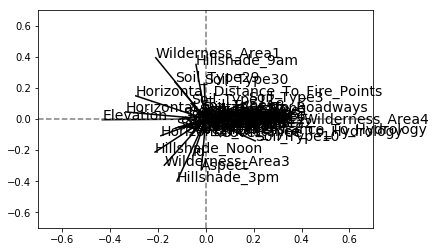

In [12]:
PCA_representation(df)